# Leveraging Logistic Regression Techniques For Profit-Boosting Credit Assessments

Created by   : Lana Fuadi
<br>LinkedIn : https://www.linkedin.com/in/lanafuadi/
<br>GitHub   : https://github.com/lanafuadi

### BACKGROUND

The lending company is currently facing challenges related to the efficiency and speed of loan processing for each customer. 
The manual assessment of credit applications is time-consuming and can lead to delays in decision-making.
As a Data Science intern, my mission is to address these inefficiencies and develop data-driven solutions that optimize the loan evaluation process, leading to faster and more accurate credit decisions. By leveraging predictive models and creating a credit scoring system, i aim to expedite loan approvals, reduce default rates, and enhance overall customer satisfaction.
Through collaboration with other teams, i seek to seamlessly integrate the credit scoring system, providing the lending company with the tools they need to make informed and efficient credit decisions that benefit both the company and its valued customers.

### GOAL

Our goal is to improve the lending company's loan processing efficiency through the development of predictive models and a credit scoring system. The ultimate aim is to expedite loan approvals, reduce default rates, and enhance overall customer satisfaction for the lending company.

### METRIC

Our metric is to evaluate the success of the predictive models and credit scoring system based on loan processing time and accuracy of credit decisions

### OBJECTIVE

Our objective is to streamline the loan evaluation process by developing a predictive model based on logistic regression, utilizing weight of evidence and information value techniques to identify key risk factors, and creating a credit scoring system.

## LOAD DATASET

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
dataset = pd.read_csv('loan_data_2007_2014.csv')

In [4]:
data = dataset.copy()

## DATA PREPARATION

In [5]:
info_data = pd.DataFrame({'Missing Values': data.isnull().sum(),
                             '% Missing': round(data.isnull().mean() * 100),
                             'Nunique': data.nunique(),
                             'Type': data.dtypes})
info_data = info_data.sort_values(by='Missing Values', ascending=False)
info      = info_data.reset_index(names='Feature')
info

,Feature,Missing Values,% Missing,Nunique,Type
0,inq_last_12m,466285,100.0,0,float64
1,total_bal_il,466285,100.0,0,float64
2,dti_joint,466285,100.0,0,float64
3,verification_status_joint,466285,100.0,0,float64
4,annual_inc_joint,466285,100.0,0,float64
5,open_acc_6m,466285,100.0,0,float64
6,open_il_6m,466285,100.0,0,float64
7,open_il_12m,466285,100.0,0,float64
8,open_il_24m,466285,100.0,0,float64
9,mths_since_rcnt_il,466285,100.0,0,float64


In [6]:
missing70       = info[info['% Missing']>70]
one_unique      = info[info['Nunique']==1]

In [7]:
print('Insight:')
print('1. we will frop', missing70.shape[0], 'features with more than 70% missing values.')
print('2. We will drop', one_unique.shape[0], 'features with only one unique values.')
print('3. We will also drop features with too many unique values.')

Insight:
1. we will frop 20 features with more than 70% missing values.
2. We will drop 2 features with only one unique values.
3. We will also drop features with too many unique values.


In [8]:
# drop features because of too many missing values (more than 70%).
dropmissing = missing70['Feature'].tolist()
data.drop(dropmissing, axis=1, inplace=True)

# drop features because they have only one unique value.
data.drop(['policy_code', 'application_type'], axis=1, inplace=True)

# drop features based on domain judgement
data.drop(['Unnamed: 0', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'addr_state', 'pymnt_plan'], axis=1, inplace=True)

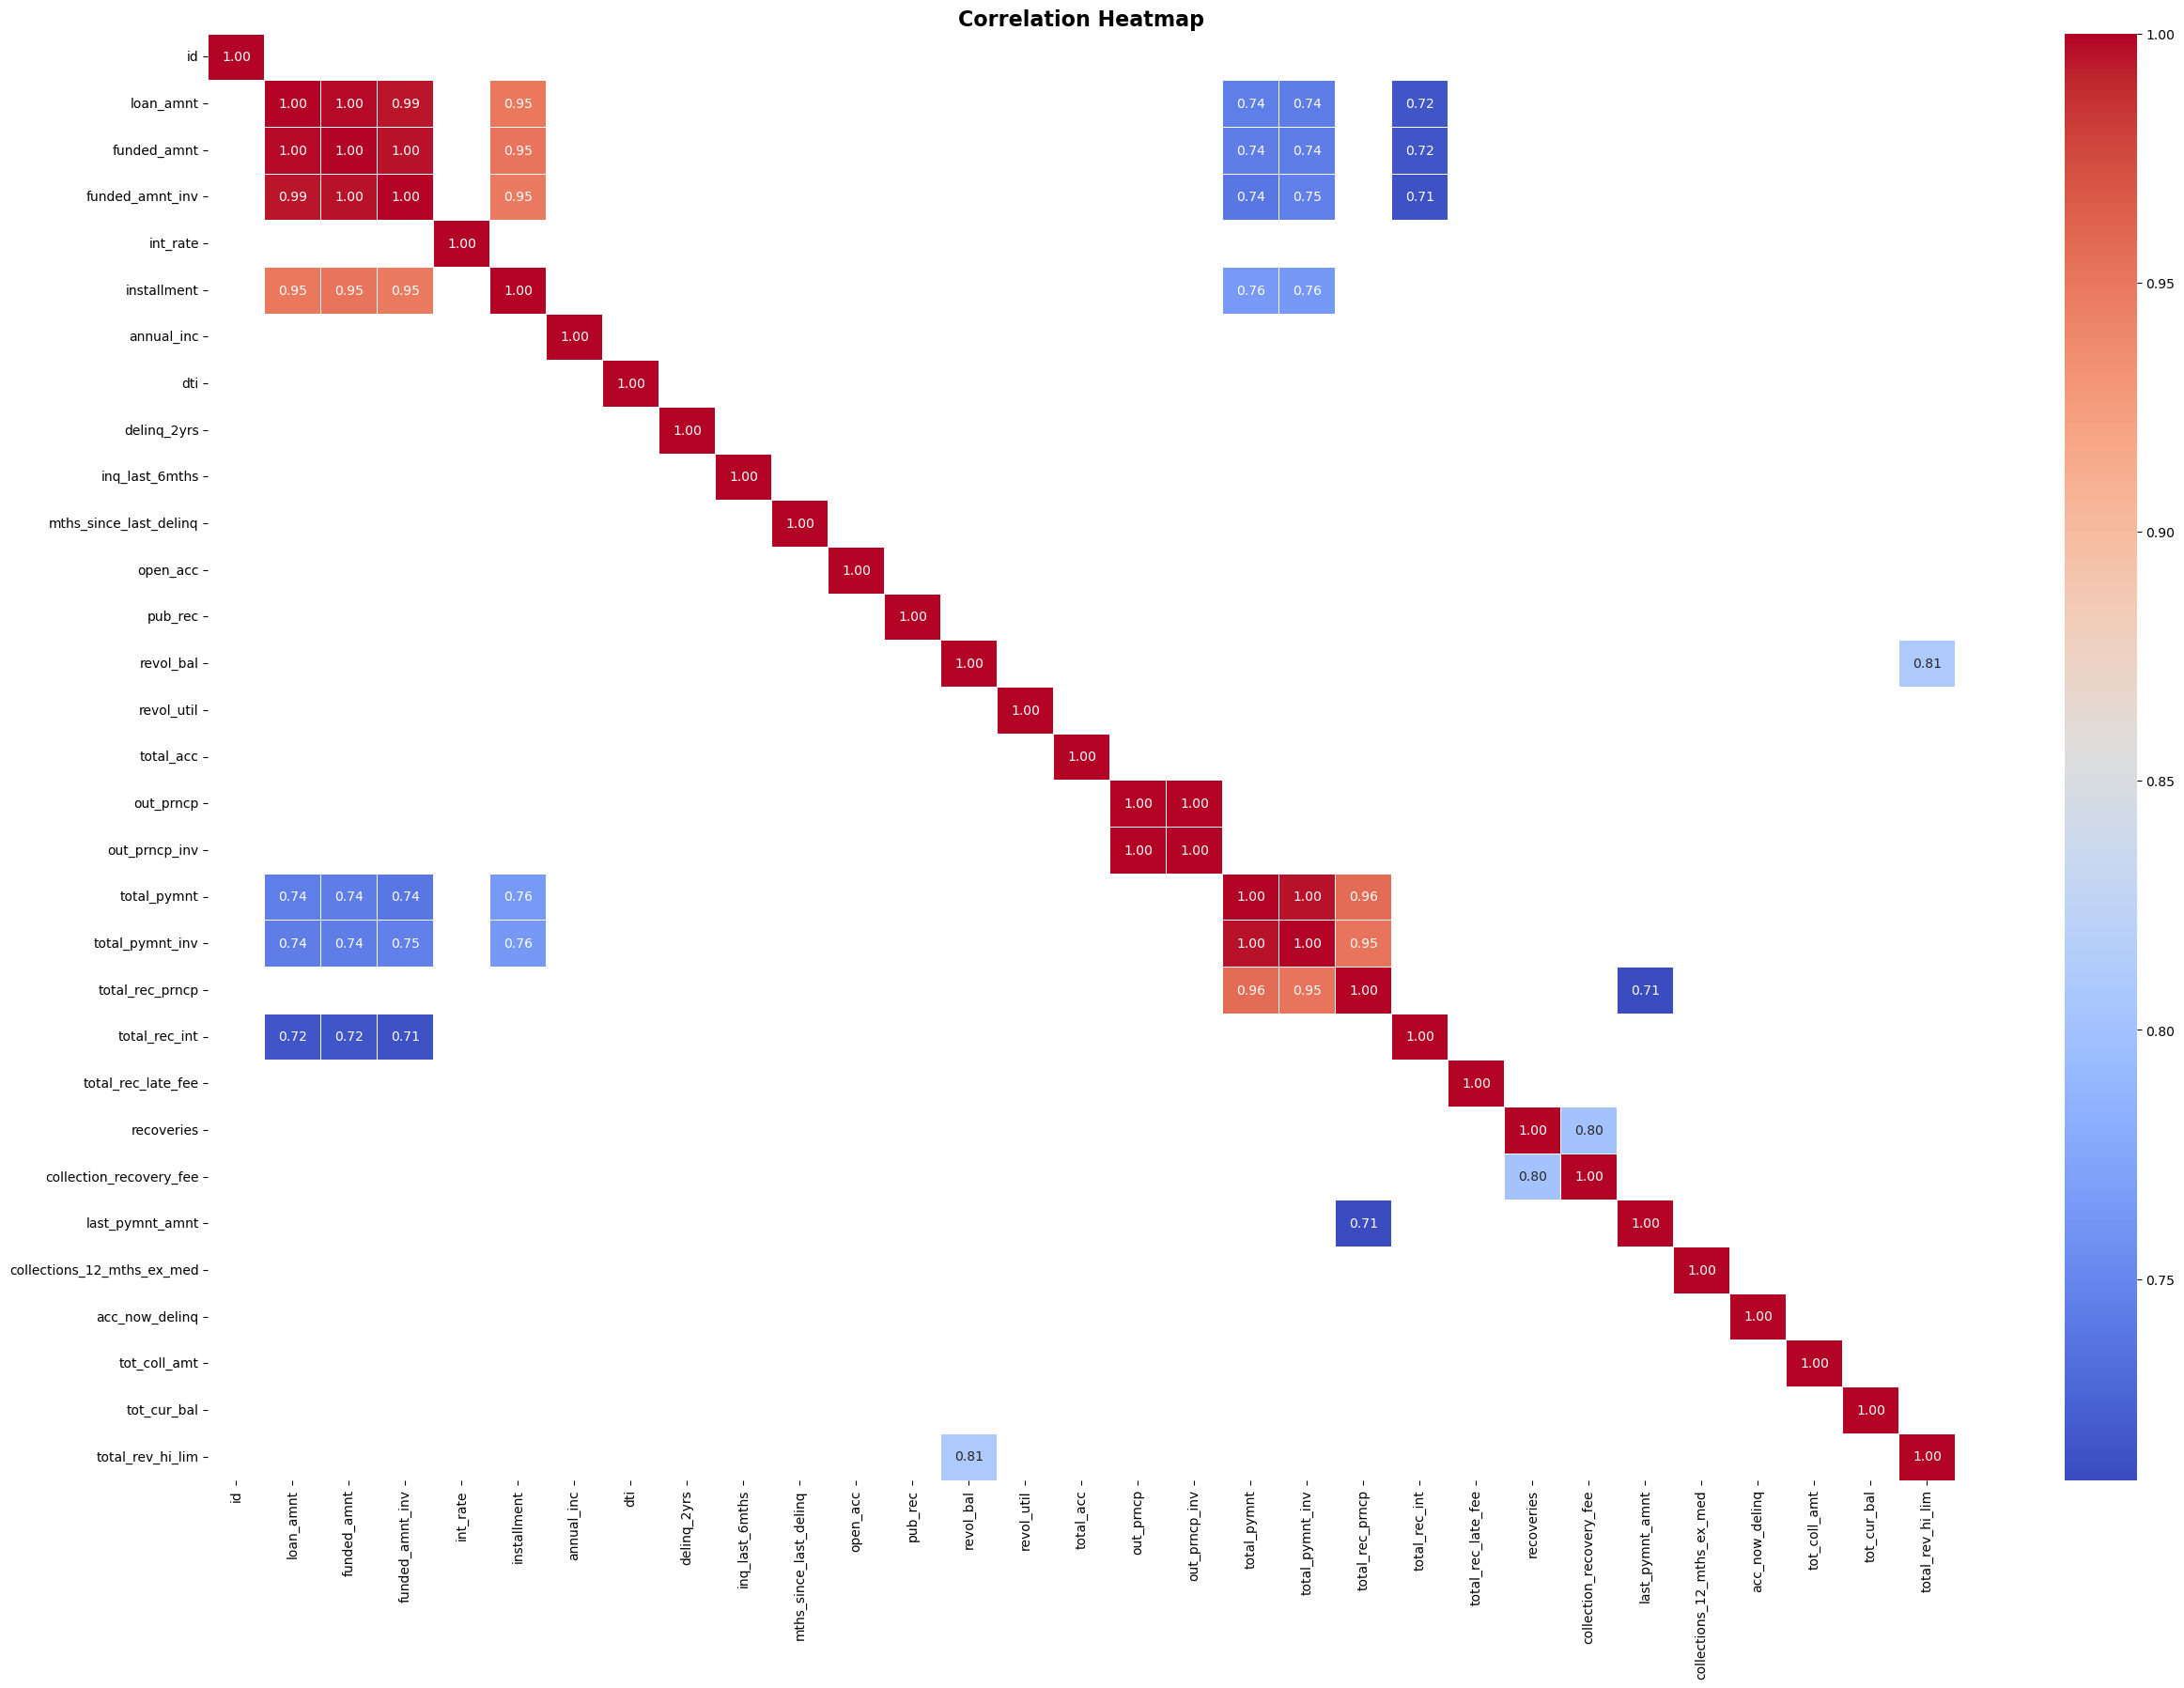

In [9]:
corr_matrix = data.corr()
mask = (corr_matrix > 0.70) | (corr_matrix < -0.70)
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix[mask], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Here we set the threshold 0.70, means features with correlation score more than 0.7 or less than -0.7 are assumed to be multicollinearity.
<br>Multicollinear features can lead to biased result, therefore we will only take one from each multicollinearity pair.

In [10]:
# Drop features because they have high multicollinearity score (>0.7)
data.drop(['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
           'total_rec_prncp','total_rev_hi_lim', 'out_prncp_inv', 'collection_recovery_fee'], axis=1, inplace=True)

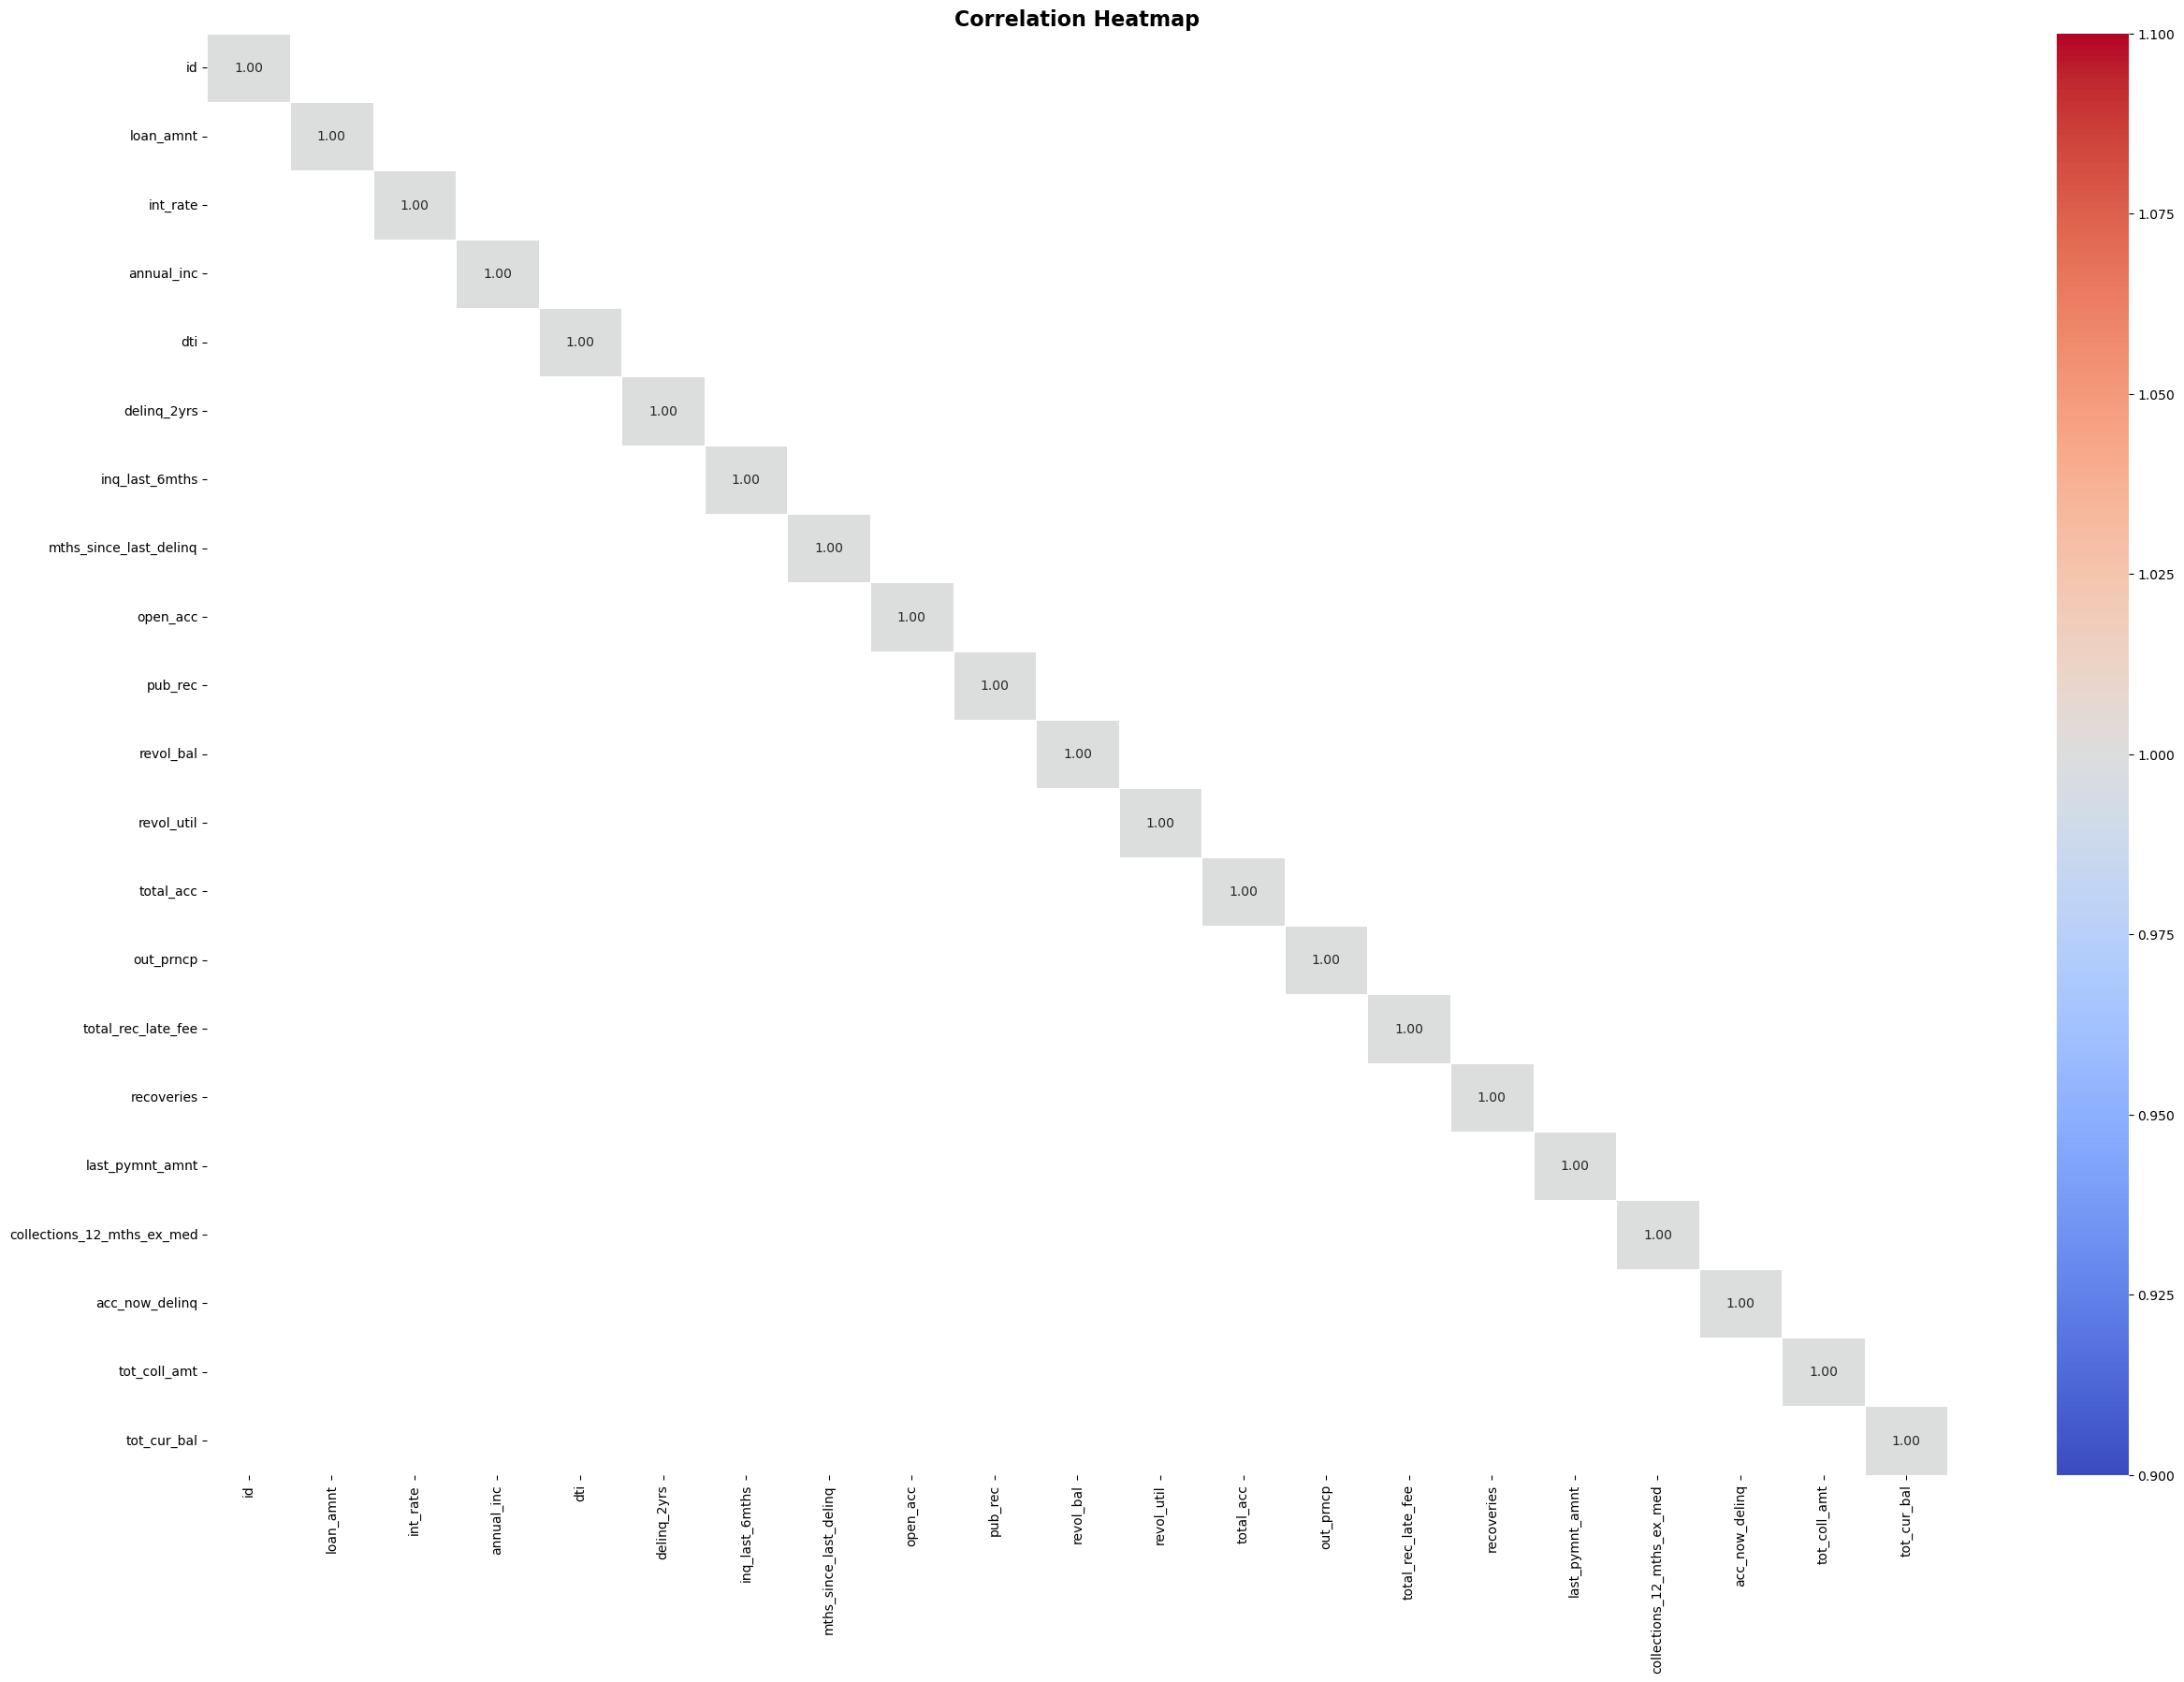

In [11]:
corr_matrix = data.corr()
mask = (corr_matrix > 0.70) | (corr_matrix < -0.70)
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix[mask], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

we have successfully handle muticollinearity in our features.

In [12]:
print('After data preparation, we have', data.shape[1], 'features left.')

After data preparation, we have 34 features left.


In [13]:
dataeda = data.copy()

In [14]:
data = dataeda.copy()

## DATA PREPROCESSING

### Imputation

In [15]:
missing_data   = pd.DataFrame({'Missing Values': data.isnull().sum(), '% Missing': round(data.isnull().mean() * 100), 'Type': data.dtypes})
missing_data   = missing_data.sort_values(by='Missing Values', ascending=False)
missing_data   = missing_data[missing_data['Missing Values']>0]
missing_values = missing_data.reset_index(names='Feature')
missing_values

,Feature,Missing Values,% Missing,Type
0,mths_since_last_delinq,250351,54.0,float64
1,next_pymnt_d,227214,49.0,object
2,tot_cur_bal,70276,15.0,float64
3,tot_coll_amt,70276,15.0,float64
4,emp_length,21008,5.0,object
5,last_pymnt_d,376,0.0,object
6,revol_util,340,0.0,float64
7,collections_12_mths_ex_med,145,0.0,float64
8,last_credit_pull_d,42,0.0,object
9,earliest_cr_line,29,0.0,object


In [16]:
data['issue_d']                  = pd.to_datetime(data['issue_d'], format='%b-%y')
data['last_credit_pull_d']       = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['last_pymnt_d']             = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['next_pymnt_d']             = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')

In [17]:
max_features  = ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
mode_features = ['emp_length', 'earliest_cr_line', 'mths_since_last_delinq', 'total_acc', 'open_acc', 'emp_length']
mean_features = ['annual_inc']
zero_features = ['open_acc', 'acc_now_delinq', 'delinq_2yrs', 'pub_rec', 'tot_cur_bal', 'tot_coll_amt', 'revol_util', 'collections_12_mths_ex_med', 'inq_last_6mths']

In [18]:
# Max imputation
for feature in max_features:
    data[feature].fillna(data[feature].max(), inplace=True)

# Mode imputation
for feature in mode_features:
    data[feature].fillna(data[feature].mode().iloc[0], inplace=True)

# Mean imputation
for feature in mean_features:
    data[feature].fillna(data[feature].mean(), inplace=True)

# Zero imputation
for feature in zero_features:
    data[feature].fillna(0, inplace=True)

In [19]:
data.isna().sum().sum()

0

In [20]:
datafe = data.copy()

In [21]:
datafe.shape

(466285, 34)

### Feature Engineering

In [22]:
# we define loan_status value as default and non-default then do label encoding, 1 represents default and 0 represents non-default
# we do this because our objective is to create machine learning model for predicting credit risk, therefore we split loan_status into 2 categories
non_default           = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period']
default               = ['Charged Off', 'Late (16-30 days)', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']
datafe['loan_status'] = datafe['loan_status'].apply(lambda x: 1 if x in default else 0)
loan_status           = datafe[['loan_status']]

In [23]:
# Define function to adjust years based on conditions
def adjust_year(year):
    if year > 17:
        return 1900 + year
    else:
        return 2000 + year

# Extract year and month features
datafe['issue_d_year']                = datafe['issue_d'].dt.year
datafe['issue_d_month']               = datafe['issue_d'].dt.month
datafe['last_credit_pull_d_year']     = datafe['last_credit_pull_d'].dt.year
datafe['last_credit_pull_d_month']    = datafe['last_credit_pull_d'].dt.month
datafe['last_pymnt_d_year']           = datafe['last_pymnt_d'].dt.year
datafe['last_pymnt_d_month']          = datafe['last_pymnt_d'].dt.month
datafe['next_pymnt_d_year']           = datafe['next_pymnt_d'].dt.year
datafe['next_pymnt_d_month']          = datafe['next_pymnt_d'].dt.month
datafe['earliest_cr_line_month']      = datafe['earliest_cr_line'].str[:3]
datafe['earliest_cr_line_year']       = datafe['earliest_cr_line'].str[-2:].astype(int)
datafe['earliest_cr_line_year']       = datafe['earliest_cr_line_year'].apply(adjust_year)

# Convert month abbreviations to numerical using map
earliest_cr_line_month_map            = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
datafe['earliest_cr_line_month']      = datafe['earliest_cr_line_month'].map(earliest_cr_line_month_map)

# Extract new features
datafe['mths_since_earliest_cr_line'] = (((datafe['last_credit_pull_d_year'] - datafe['earliest_cr_line_year']) * 12) + (datafe['last_credit_pull_d_month']- datafe['earliest_cr_line_month']))
datafe['mths_since_last_pymnt']       = (((datafe['last_credit_pull_d_year'] - datafe['last_pymnt_d_year']) * 12) + (datafe['last_credit_pull_d_month']- datafe['last_pymnt_d_month']))
datafe['mths_to_next_pymnt']          = (((datafe['next_pymnt_d_year'] - datafe['last_credit_pull_d_year']) * 12) + (datafe['next_pymnt_d_month'] - datafe['last_credit_pull_d_month']))
datafe['pymnt_time']                  = (((datafe['next_pymnt_d_year'] - datafe['last_pymnt_d_year']) * 12) + (datafe['next_pymnt_d_month'] - datafe['last_pymnt_d_month']))

# Drop the original columns
datafe.drop(['issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d_year', 'earliest_cr_line', 'issue_d_year', 'issue_d_month', 'last_credit_pull_d_month',
             'last_pymnt_d_year', 'last_pymnt_d_month', 'next_pymnt_d_year', 'next_pymnt_d_month', 'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)

last_credit_pull_d is also known as a credit inquiry or credit check, occurs when a lender or creditor accesses an individual's credit report to assess their creditworthiness before making a lending decision. we assumed that this features is when the dataset created, therefore we use it as basis to extract new features like mths_since_issue, mths_since_last_pymnt, mths_to_next_pymnt and mths_since_earliest_cr_line.

In [24]:
negative_values = datafe[(datafe['mths_since_last_pymnt'] < 0) | (datafe['mths_to_next_pymnt'] < 0) | (datafe['mths_since_earliest_cr_line'] < 0)]
print('There are', negative_values.shape[0], 'negative values in any new extracted features.')
print('This happened where the last credit pull date is earlier than the other date related to credit behavior,')
print('seems contradictory and raises questions about the accuracy or interpretation of the data.')
print('Typically, the last credit pull date should be more recent than the other date related to credit behavior.')
print('We will convert those negative values to 0.')

There are 10713 negative values in any new extracted features.
This happened where the last credit pull date is earlier than the other date related to credit behavior,
seems contradictory and raises questions about the accuracy or interpretation of the data.
Typically, the last credit pull date should be more recent than the other date related to credit behavior.
We will convert those negative values to 0.


In [25]:
# List of column names with negative values to be replaced with 0
columns_to_convert = ['mths_since_last_pymnt', 'mths_to_next_pymnt', 'mths_since_earliest_cr_line']

# Replace negative values with 0 in the specified columns
for column in columns_to_convert:
    datafe.loc[datafe[column] < 0, column] = 0

In [26]:
datawoe = datafe.copy()

In [27]:
datawoe.shape

(466285, 33)

## WOE & IV

In [28]:
# Create Function for Weight of Evidence and Invormation Value

def woe(df, feature_name):
    feature_name                       = df.groupby(feature_name).agg(num_observation=('loan_status','count'),good_loan_prob=('loan_status','mean')).reset_index()
    feature_name['grade_proportion']   = feature_name['num_observation']/feature_name['num_observation'].sum()
    feature_name['num_good_loan']      = feature_name['grade_proportion'] * feature_name['num_observation']
    feature_name['num_bad_loan']       = (1-feature_name['grade_proportion']) * feature_name['num_observation']
    feature_name['good_loan_prop']     = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()
    feature_name['bad_loan_prop']      = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()
    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])
    feature_name                       = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    feature_name['information_value']  = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']
    feature_name['information_value']  = feature_name['information_value'].sum()

    feature_name                       = feature_name.drop(['grade_proportion','num_good_loan','num_bad_loan','good_loan_prop','bad_loan_prop'],axis = 1)
    return feature_name

In [29]:
def dist(feature):
    plt.figure(figsize=(4,2))
    sns.violinplot(datawoe[feature],color='blue')
    print('number of unique values :',datawoe[feature].nunique())
    print('Distribution :')
    print(datawoe[feature].describe())

| Information Value | Predictive Power         |
|:-----------------:|:------------------------:|
| < 0.02            | Useless for prediction   |
| 0.02 - 0.1        | Weak predictive power    |
| 0.1 - 0.3         | Medium predictive power  |
| 0.3 - 0.5         | Strong predictive power  |
| > 0.5             | Too good to be true      |


* We will decide whether the feature will be used or will be remove or adjusted based on the information value rules above

### Weight of Evidence & Informational Value for Categorical Features

Term

In [30]:
woe(datawoe,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60 months,128332,0.144991,-1.378129,0.72423
1,36 months,337953,0.099360,0.558444,0.72423


Grade

In [31]:
woe(datawoe,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,3322,0.283564,-3.660567,0.292639
1,F,13229,0.246957,-2.257091,0.292639
2,E,35757,0.199653,-1.211753,0.292639
3,A,74867,0.039470,-0.377550,0.292639
4,D,76888,0.157788,-0.345737,0.292639
5,C,125293,0.117668,0.275309,0.292639
6,B,136929,0.080392,0.398836,0.292639


Employment Length

In [32]:
woe(datawoe,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,17888,0.115496,-1.682895,1.030304
1,8 years,22395,0.112302,-1.448086,1.030304
2,6 years,26112,0.119332,-1.286119,1.030304
3,7 years,26180,0.113789,-1.283364,1.030304
4,4 years,28023,0.112443,-1.211138,1.030304
5,1 year,29622,0.114307,-1.151991,1.030304
6,5 years,30774,0.117339,-1.111196,1.030304
7,< 1 year,36265,0.122074,-0.934325,1.030304
8,3 years,36596,0.112253,-0.924469,1.030304
9,2 years,41373,0.112320,-0.790600,1.030304


Home Ownership

In [33]:
woe(datawoe,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,ANY,1,0.000000,-12.759563,0.31222
1,NONE,50,0.160000,-8.847435,0.31222
2,OTHER,182,0.208791,-7.555168,0.31222
3,OWN,41704,0.111332,-2.027518,0.31222
4,RENT,188473,0.128666,-0.095002,0.31222
5,MORTGAGE,235875,0.098556,0.316429,0.31222


Verification Status

In [34]:
woe(datawoe,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Not Verified,148237,0.095826,-0.075220,0.007663
1,Source Verified,149993,0.107272,-0.057908,0.007663
2,Verified,168055,0.130261,0.114596,0.007663


Purpose

In [35]:
woe(datawoe,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,renewable_energy,351,0.153846,-6.796087,1.409257
1,educational,422,0.208531,-6.611715,1.409257
2,house,2269,0.141913,-4.925653,1.409257
3,wedding,2343,0.121639,-4.893401,1.409257
4,vacation,2487,0.122638,-4.833445,1.409257
5,moving,2994,0.155311,-4.646819,1.409257
6,medical,4602,0.135593,-4.213461,1.409257
7,car,5397,0.090421,-4.052385,1.409257
8,small_business,7013,0.220448,-3.786951,1.409257
9,major_purchase,9828,0.097884,-3.443333,1.409257


Initial List Status

In [36]:
woe(datawoe,'initial_list_status')

,initial_list_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,w,163280,0.092259,-0.798355,0.340013
1,f,303005,0.122513,0.438211,0.340013


From Categorical Features we will drop useless, weak, and suspicious features.
<br>Thus we will drop term, emp_length, verification_status, and purpose.

### Weight of Evidence & Informational Value for Numerical Features

Loan Amount

number of unique values : 1352
Distribution :
count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


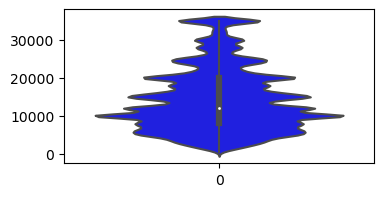

In [37]:
dist('loan_amnt')

In [38]:
datawoe['loan_amnt_woe'] = pd.cut(datawoe['loan_amnt'],10)
woe(datawoe,'loan_amnt_woe')

,loan_amnt_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28100.0, 31550.0]",13389,0.128912,-1.618217,0.249994
1,"(31550.0, 35000.0]",21517,0.121160,-1.125698,0.249994
2,"(21200.0, 24650.0]",25467,0.115875,-0.948237,0.249994
3,"(24650.0, 28100.0]",26705,0.115072,-0.897957,0.249994
4,"(465.5, 3950.0]",27901,0.107738,-0.851421,0.249994
5,"(17750.0, 21200.0]",58167,0.113656,-0.045227,0.249994
6,"(14300.0, 17750.0]",60751,0.114484,0.004590,0.249994
7,"(10850.0, 14300.0]",65080,0.107913,0.084156,0.249994
8,"(3950.0, 7400.0]",75702,0.105625,0.262176,0.249994
9,"(7400.0, 10850.0]",91606,0.111761,0.494439,0.249994


Interest Rate

number of unique values : 506
Distribution :
count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


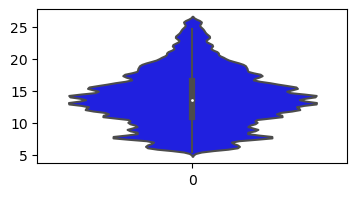

In [39]:
dist('int_rate')

In [40]:
datawoe['int_rate_woe'] = pd.cut(datawoe['int_rate'],10)
woe(datawoe,'int_rate_woe')

,int_rate_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(23.996, 26.06]",8846,0.241239,-2.104911,0.273615
1,"(21.932, 23.996]",14343,0.236213,-1.609524,0.273615
2,"(19.868, 21.932]",19782,0.200738,-1.275906,0.273615
3,"(5.399, 7.484]",27568,0.025392,-0.926431,0.273615
4,"(17.804, 19.868]",38003,0.181380,-0.581349,0.273615
5,"(7.484, 9.548]",56410,0.045240,-0.142438,0.273615
6,"(9.548, 11.612]",58827,0.073113,-0.094569,0.273615
7,"(15.74, 17.804]",60358,0.155423,-0.065112,0.273615
8,"(13.676, 15.74]",87615,0.117229,0.377055,0.273615
9,"(11.612, 13.676]",94533,0.090921,0.471490,0.273615


Annual Income

number of unique values : 31902
Distribution :
count    4.662850e+05
mean     7.327738e+04
std      5.496333e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


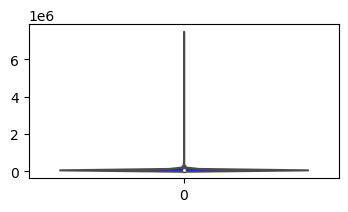

In [41]:
dist('annual_inc')

In [42]:
datawoe['annual_inc_woe'] = np.where((datawoe['annual_inc']>=0)&(datawoe['annual_inc']<=200000),'low_income',
                               np.where((datawoe['annual_inc']>200000)&(datawoe['annual_inc']<=1500000),'med_income','high_income'))
woe(datawoe,'annual_inc_woe')

,annual_inc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,high_income,19,0.000000,-13.488976,4.080337
1,med_income,7781,0.071713,-7.457187,4.080337
2,low_income,458485,0.112606,0.692901,4.080337


Debt To Income

number of unique values : 3997
Distribution :
count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


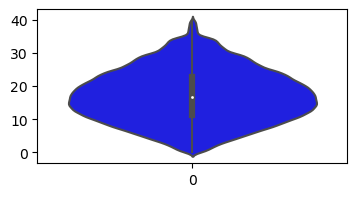

In [43]:
dist('dti')

In [44]:
datawoe['dti_woe'] = pd.cut(datawoe['dti'],10)
woe(datawoe,'dti_woe')

,dti_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(35.991, 39.99]",2753,0.124228,-3.292330,0.215744
1,"(31.992, 35.991]",13654,0.137396,-1.667191,0.215744
2,"(-0.04, 3.999]",16728,0.094931,-1.457325,0.215744
3,"(27.993, 31.992]",30288,0.137018,-0.833030,0.215744
4,"(3.999, 7.998]",42962,0.088427,-0.453966,0.215744
5,"(23.994, 27.993]",50073,0.132047,-0.283859,0.215744
6,"(7.998, 11.997]",69311,0.094805,0.088587,0.215744
7,"(19.995, 23.994]",71058,0.125756,0.117890,0.215744
8,"(15.996, 19.995]",84089,0.114272,0.319796,0.215744
9,"(11.997, 15.996]",85369,0.101946,0.338258,0.215744


#### WOE: `delinq_2yrs`

number of unique values : 24
Distribution :
count    466285.000000
mean          0.284661
std           0.797343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


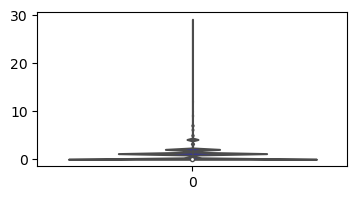

In [45]:
dist('delinq_2yrs')

In [46]:
datawoe['delinq_2yrs_woe'] = pd.cut(datawoe['delinq_2yrs'],10)
woe(datawoe,'delinq_2yrs_woe')

,delinq_2yrs_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(23.2, 26.1]",1,0.000000,-16.101818,4.007423
1,"(26.1, 29.0]",1,0.000000,-16.101818,4.007423
2,"(20.3, 23.2]",4,0.250000,-14.715518,4.007423
3,"(17.4, 20.3]",9,0.111111,-13.904577,4.007423
4,"(14.5, 17.4]",15,0.133333,-13.393738,4.007423
5,"(11.6, 14.5]",71,0.239437,-11.838988,4.007423
6,"(8.7, 11.6]",217,0.110599,-10.721458,4.007423
7,"(5.8, 8.7]",1152,0.116319,-9.050092,4.007423
8,"(2.9, 5.8]",9298,0.115616,-6.944124,4.007423
9,"(-0.029, 2.9]",455517,0.111811,0.695586,4.007423


Inquiry In Last 6 Months

number of unique values : 28
Distribution :
count    466285.000000
mean          0.804695
std           1.091583
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


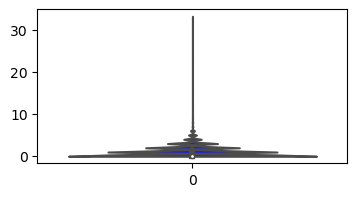

In [47]:
dist('inq_last_6mths')

In [48]:
datawoe['inq_last_6mths_woe'] = pd.cut(datawoe['inq_last_6mths'],10)
woe(datawoe,'inq_last_6mths_woe')

,inq_last_6mths_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(19.8, 23.1]",1,1.000000,-16.022424,3.763579
1,"(26.4, 29.7]",2,0.000000,-15.329275,3.763579
2,"(23.1, 26.4]",3,0.333333,-14.923808,3.763579
3,"(29.7, 33.0]",3,0.666667,-14.923808,3.763579
4,"(16.5, 19.8]",8,0.375000,-13.942968,3.763579
5,"(13.2, 16.5]",18,0.555556,-13.132016,3.763579
6,"(9.9, 13.2]",60,0.233333,-11.927953,3.763579
7,"(6.6, 9.9]",367,0.359673,-10.116277,3.763579
8,"(3.3, 6.6]",11197,0.168795,-6.674719,3.763579
9,"(-0.033, 3.3]",454626,0.110273,0.693523,3.763579


Open Account

number of unique values : 62
Distribution :
count    466285.000000
mean         11.186933
std           4.987401
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


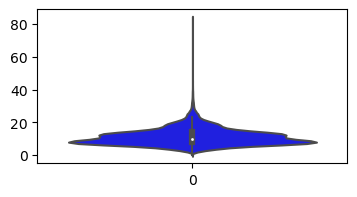

In [49]:
dist('open_acc')

In [50]:
datawoe['open_acc_woe'] = pd.cut(datawoe['open_acc'],10)
woe(datawoe,'open_acc_woe')

,open_acc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(67.2, 75.6]",1,0.000000,-12.699435,0.523715
1,"(58.8, 67.2]",2,0.000000,-12.006286,0.523715
2,"(75.6, 84.0]",3,0.666667,-11.600819,0.523715
3,"(50.4, 58.8]",20,0.000000,-9.703662,0.523715
4,"(42.0, 50.4]",81,0.086420,-8.304815,0.523715
5,"(33.6, 42.0]",817,0.111383,-5.992045,0.523715
6,"(25.2, 33.6]",5131,0.105048,-4.145317,0.523715
7,"(16.8, 25.2]",56491,0.109363,-1.628458,0.523715
8,"(-0.084, 8.4]",151903,0.112414,-0.374252,0.523715
9,"(8.4, 16.8]",251836,0.112347,0.513821,0.523715


Total Account

number of unique values : 112
Distribution :
count    466285.000000
mean         25.064177
std          11.599824
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64


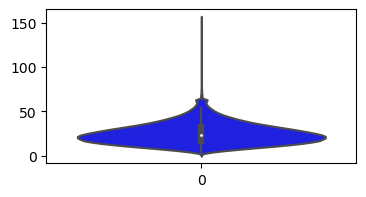

In [51]:
dist('total_acc')

In [52]:
datawoe['total_acc_woe'] = pd.cut(datawoe['total_acc'],7)
woe(datawoe,'total_acc_woe')

,total_acc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(133.857, 156.0]",2,0.000000,-12.156646,0.272906
1,"(111.714, 133.857]",6,0.000000,-11.058025,0.272906
2,"(89.571, 111.714]",53,0.094340,-8.879392,0.272906
3,"(67.429, 89.571]",701,0.092725,-6.295785,0.272906
4,"(45.286, 67.429]",25756,0.104286,-2.636554,0.272906
5,"(23.143, 45.286]",206351,0.105674,-0.028094,0.272906
6,"(0.845, 23.143]",233416,0.118347,0.205101,0.272906


Public Record

number of unique values : 26
Distribution :
count    466285.000000
mean          0.160554
std           0.510848
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64


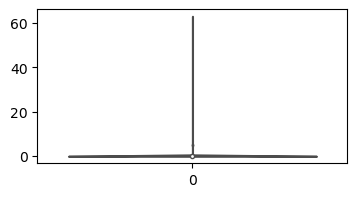

In [53]:
dist('pub_rec')

In [54]:
datawoe['pub_rec_woe'] = pd.cut(datawoe['pub_rec'],10)
woe(datawoe,'pub_rec_woe')

,pub_rec_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(31.5, 37.8]",1,0.000000,-20.434881,8.320056
1,"(37.8, 44.1]",1,0.000000,-20.434881,8.320056
2,"(44.1, 50.4]",1,0.000000,-20.434881,8.320056
3,"(50.4, 56.7]",1,0.000000,-20.434881,8.320056
4,"(56.7, 63.0]",1,0.000000,-20.434881,8.320056
5,"(18.9, 25.2]",2,0.000000,-19.741731,8.320056
6,"(12.6, 18.9]",8,0.000000,-18.355424,8.320056
7,"(6.3, 12.6]",130,0.069231,-15.567070,8.320056
8,"(-0.063, 6.3]",466140,0.111934,0.693177,8.320056
9,"(25.2, 31.5]",0,NaN,NaN,8.320056


Revolve Balance

number of unique values : 58142
Distribution :
count    4.662850e+05
mean     1.623020e+04
std      2.067625e+04
min      0.000000e+00
25%      6.413000e+03
50%      1.176400e+04
75%      2.033300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64


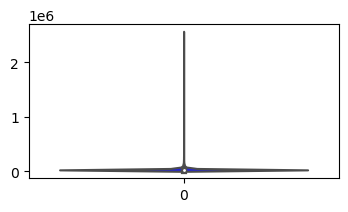

In [55]:
dist('revol_bal')

In [56]:
datawoe['revol_bal_fc'] = np.where((datawoe['revol_bal']>=0)&(datawoe['revol_bal']<=5000),0,
                          np.where((datawoe['revol_bal']>5000)&(datawoe['revol_bal']<=10000),1,
                          np.where((datawoe['revol_bal']>10000)&(datawoe['revol_bal']<=15000),2,3)))
woe(datawoe,'revol_bal_fc')

,revol_bal_fc,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,82590,0.115619,-0.576520,0.197731
1,2,88805,0.115680,-0.487635,0.197731
2,1,115537,0.116517,-0.151038,0.197731
3,3,179353,0.105390,0.489550,0.197731


Revolve Utilize

number of unique values : 1269
Distribution :
count    466285.000000
mean         56.135985
std          23.772387
min           0.000000
25%          39.200000
50%          57.500000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64


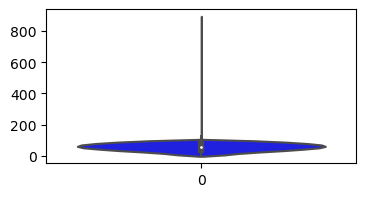

In [57]:
dist('revol_util')

In [58]:
datawoe['revol_util_fc'] = np.where((datawoe['revol_util']>=0)&(datawoe['revol_util']<=20),0,
                           np.where((datawoe['revol_util']>20)&(datawoe['revol_util']<=40),1,
                           np.where((datawoe['revol_util']>40)&(datawoe['revol_util']<=60),2,
                           np.where((datawoe['revol_util']>60)&(datawoe['revol_util']<=80),3,4))))
woe(datawoe,'revol_util_fc')

,revol_util_fc,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,37742,0.084919,-1.208663,0.156751
1,1,83492,0.093710,-0.301789,0.156751
2,4,84062,0.135912,-0.293495,0.156751
3,2,129397,0.107244,0.264089,0.156751
4,3,131592,0.120486,0.287447,0.156751


Outstanding Principle

number of unique values : 135665
Distribution :
count    466285.000000
mean       4410.062342
std        6355.078769
min           0.000000
25%           0.000000
50%         441.470000
75%        7341.650000
max       32160.380000
Name: out_prncp, dtype: float64


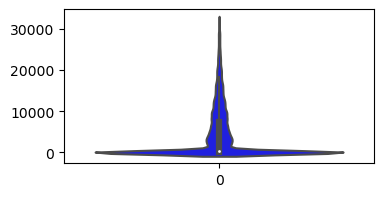

In [59]:
dist('out_prncp')

In [60]:
datawoe['out_prncp_woe'] = pd.cut(datawoe['out_prncp'],10)
woe(datawoe,'out_prncp_woe')

,out_prncp_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28944.342, 32160.38]",1069,0.117867,-5.673524,1.693731
1,"(25728.304, 28944.342]",3501,0.051128,-4.481957,1.693731
2,"(22512.266, 25728.304]",5698,0.050544,-3.990132,1.693731
3,"(19296.228, 22512.266]",9548,0.049330,-3.465522,1.693731
4,"(16080.19, 19296.228]",14389,0.045382,-3.044734,1.693731
5,"(12864.152, 16080.19]",20961,0.042794,-2.653884,1.693731
6,"(9648.114, 12864.152]",32345,0.042603,-2.194192,1.693731
7,"(6432.076, 9648.114]",40780,0.037641,-1.942830,1.693731
8,"(3216.038, 6432.076]",53837,0.036518,-1.633895,1.693731
9,"(-32.16, 3216.038]",284157,0.157283,0.847072,1.693731


Total Recovery Fee

number of unique values : 5808
Distribution :
count    466285.000000
mean          0.650129
std           5.265730
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64


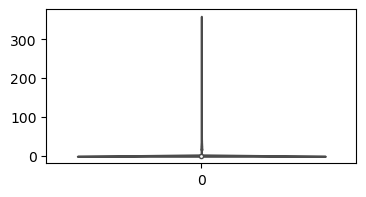

In [61]:
dist('total_rec_late_fee')

In [62]:
datawoe['total_rec_late_fee_woe'] = pd.cut(datawoe['total_rec_late_fee'],10)
woe(datawoe,'total_rec_late_fee_woe')

,total_rec_late_fee_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(286.944, 322.812]",1,1.000000,-17.664310,5.618606
1,"(322.812, 358.68]",1,1.000000,-17.664310,5.618606
2,"(215.208, 251.076]",2,0.500000,-16.971161,5.618606
3,"(251.076, 286.944]",3,0.333333,-16.565693,5.618606
4,"(179.34, 215.208]",8,0.500000,-15.584853,5.618606
5,"(143.472, 179.34]",19,0.578947,-14.719832,5.618606
6,"(107.604, 143.472]",85,0.529412,-13.221479,5.618606
7,"(71.736, 107.604]",279,0.541219,-12.032502,5.618606
8,"(35.868, 71.736]",1905,0.537008,-10.107981,5.618606
9,"(-0.359, 35.868]",463982,0.109806,0.693873,5.618606


Recoveries

number of unique values : 22773
Distribution :
count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


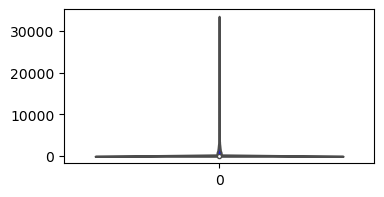

In [63]:
dist('recoveries')

In [64]:
datawoe['recoveries_woe'] = pd.cut(datawoe['recoveries'],10)
woe(datawoe,'recoveries_woe')

,recoveries_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(30168.243, 33520.27]",2,1.000000,-16.691282,5.288953
1,"(23464.189, 26816.216]",3,1.000000,-16.285814,5.288953
2,"(26816.216, 30168.243]",3,1.000000,-16.285814,5.288953
3,"(20112.162, 23464.189]",10,1.000000,-15.081827,5.288953
4,"(16760.135, 20112.162]",13,1.000000,-14.819456,5.288953
5,"(13408.108, 16760.135]",32,1.000000,-13.918629,5.288953
6,"(10056.081, 13408.108]",74,1.000000,-13.080209,5.288953
7,"(6704.054, 10056.081]",241,1.000000,-11.899119,5.288953
8,"(3352.027, 6704.054]",2664,1.000000,-9.491119,5.288953
9,"(-33.52, 3352.027]",463243,0.106087,0.693856,5.288953


Last Payment Amount

number of unique values : 198194
Distribution :
count    466285.000000
mean       3123.913796
std        5554.737393
min           0.000000
25%         312.620000
50%         545.960000
75%        3187.510000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64


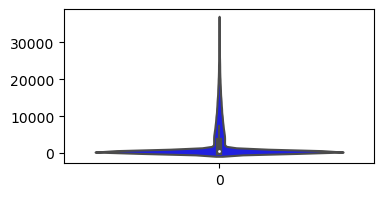

In [65]:
dist('last_pymnt_amnt')

In [66]:
datawoe['last_pymnt_amnt_fc'] = np.where((datawoe['last_pymnt_amnt']>=0)&(datawoe['last_pymnt_amnt']<=500),0,
                                np.where((datawoe['last_pymnt_amnt']>500)&(datawoe['last_pymnt_amnt']<=1000),1,
                                np.where((datawoe['last_pymnt_amnt']>1000)&(datawoe['last_pymnt_amnt']<=1500),2,
                                np.where((datawoe['last_pymnt_amnt']>1500)&(datawoe['last_pymnt_amnt']<=3500),3,4))))
woe(datawoe,'last_pymnt_amnt_fc')

,last_pymnt_amnt_fc,num_observation,good_loan_prob,weight_of_evidence,information_value
0,2,14979,0.122104,-2.659133,0.526734
1,3,23745,0.015877,-2.178796,0.526734
2,1,98694,0.154143,-0.568584,0.526734
3,4,112856,0.001019,-0.395207,0.526734
4,0,216011,0.160418,0.599136,0.526734


Collections In 12 Months Excluded Medical

number of unique values : 9
Distribution :
count    466285.000000
mean          0.009082
std           0.108632
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64


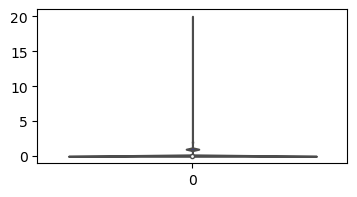

In [67]:
dist('collections_12_mths_ex_med')

In [68]:
datawoe['collections_12_mths_ex_med_woe'] = pd.cut(datawoe['collections_12_mths_ex_med'],10)
woe(datawoe,'collections_12_mths_ex_med_woe')

,collections_12_mths_ex_med_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(14.0, 16.0]",1,0.000000,-22.010686,9.917036
1,"(18.0, 20.0]",1,0.000000,-22.010686,9.917036
2,"(4.0, 6.0]",2,0.000000,-21.317536,9.917036
3,"(2.0, 4.0]",26,0.115385,-18.752536,9.917036
4,"(-0.02, 2.0]",466255,0.111919,0.693155,9.917036
5,"(6.0, 8.0]",0,NaN,NaN,9.917036
6,"(8.0, 10.0]",0,NaN,NaN,9.917036
7,"(10.0, 12.0]",0,NaN,NaN,9.917036
8,"(12.0, 14.0]",0,NaN,NaN,9.917036
9,"(16.0, 18.0]",0,NaN,NaN,9.917036


Account Now Delinquent

number of unique values : 6
Distribution :
count    466285.000000
mean          0.004002
std           0.068635
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64


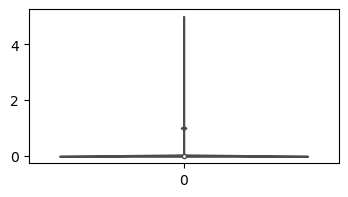

In [69]:
dist('acc_now_delinq')

In [70]:
datawoe['acc_now_delinq_woe'] = pd.cut(datawoe['acc_now_delinq'],10)
woe(datawoe,'acc_now_delinq_woe')

,acc_now_delinq_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(4.5, 5.0]",2,0.500000,-17.257843,5.728868
1,"(3.5, 4.0]",4,0.000000,-16.564691,5.728868
2,"(2.5, 3.0]",11,0.181818,-15.553075,5.728868
3,"(1.5, 2.0]",92,0.097826,-13.429008,5.728868
4,"(0.5, 1.0]",1623,0.110290,-10.555476,5.728868
5,"(-0.005, 0.5]",464553,0.111925,0.693357,5.728868
6,"(1.0, 1.5]",0,NaN,NaN,5.728868
7,"(2.0, 2.5]",0,NaN,NaN,5.728868
8,"(3.0, 3.5]",0,NaN,NaN,5.728868
9,"(4.0, 4.5]",0,NaN,NaN,5.728868


Total Collection Amount

number of unique values : 6321
Distribution :
count    4.662850e+05
mean     1.629893e+02
std      1.348289e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


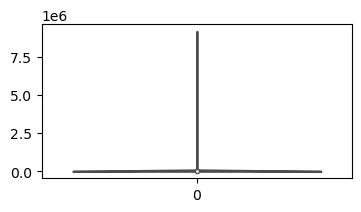

In [71]:
dist('tot_coll_amt')

In [72]:
datawoe['tot_coll_amt_woe'] = pd.cut(datawoe['tot_coll_amt'],10)
woe(datawoe,'tot_coll_amt_woe')

,tot_coll_amt_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(8237290.5, 9152545.0]",1,0.000000,-25.411953,13.05255
1,"(-9152.545, 915254.5]",466284,0.111919,0.693147,13.05255
2,"(915254.5, 1830509.0]",0,NaN,NaN,13.05255
3,"(1830509.0, 2745763.5]",0,NaN,NaN,13.05255
4,"(2745763.5, 3661018.0]",0,NaN,NaN,13.05255
5,"(3661018.0, 4576272.5]",0,NaN,NaN,13.05255
6,"(4576272.5, 5491527.0]",0,NaN,NaN,13.05255
7,"(5491527.0, 6406781.5]",0,NaN,NaN,13.05255
8,"(6406781.5, 7322036.0]",0,NaN,NaN,13.05255
9,"(7322036.0, 8237290.5]",0,NaN,NaN,13.05255


Total Current Balance

number of unique values : 220690
Distribution :
count    4.662850e+05
mean     1.178823e+05
std      1.487196e+05
min      0.000000e+00
25%      1.546700e+04
50%      5.247900e+04
75%      1.849300e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


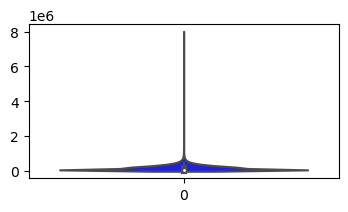

In [73]:
dist('tot_cur_bal')

In [74]:
datawoe['tot_cur_bal_woe'] = pd.cut(datawoe['tot_cur_bal'],10)
woe(datawoe,'tot_cur_bal_woe')

,tot_cur_bal_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(7200070.2, 8000078.0]",1,0.000000,-17.969097,5.766128
1,"(4000039.0, 4800046.8]",2,0.000000,-17.275948,5.766128
2,"(3200031.2, 4000039.0]",9,0.111111,-15.771855,5.766128
3,"(2400023.4, 3200031.2]",15,0.000000,-15.261017,5.766128
4,"(1600015.6, 2400023.4]",93,0.075269,-13.436300,5.766128
5,"(800007.8, 1600015.6]",1581,0.054396,-10.599890,5.766128
6,"(-8000.078, 800007.8]",464584,0.112126,0.693379,5.766128
7,"(4800046.8, 5600054.6]",0,NaN,NaN,5.766128
8,"(5600054.6, 6400062.4]",0,NaN,NaN,5.766128
9,"(6400062.4, 7200070.2]",0,NaN,NaN,5.766128


Month Since Last Delinquent

number of unique values : 145
Distribution :
count    466285.000000
mean         20.625722
std          19.399649
min           0.000000
25%           9.000000
50%           9.000000
75%          28.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64


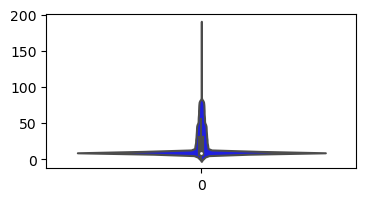

In [75]:
dist('mths_since_last_delinq')

In [76]:
datawoe['mths_since_last_delinq_woe'] = pd.cut(datawoe['mths_since_last_delinq'],10)
woe(datawoe, 'mths_since_last_delinq_woe')

,mths_since_last_delinq_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(169.2, 188.0]",3,0.000000,-11.920918,1.522533
1,"(150.4, 169.2]",4,0.250000,-11.633234,1.522533
2,"(131.6, 150.4]",18,0.166667,-10.129126,1.522533
3,"(112.8, 131.6]",24,0.041667,-9.841431,1.522533
4,"(94.0, 112.8]",69,0.159420,-8.785282,1.522533
5,"(75.2, 94.0]",8884,0.113575,-3.908293,1.522533
6,"(56.4, 75.2]",31602,0.110468,-2.588381,1.522533
7,"(37.6, 56.4]",46976,0.109907,-2.155956,1.522533
8,"(18.8, 37.6]",63013,0.107152,-1.823255,1.522533
9,"(-0.188, 18.8]",315692,0.113259,0.773202,1.522533


Month Since Earliest Credit Line

number of unique values : 688
Distribution :
count    466285.000000
mean        215.443585
std          87.539359
min          16.000000
25%         156.000000
50%         198.000000
75%         259.000000
max         864.000000
Name: mths_since_earliest_cr_line, dtype: float64


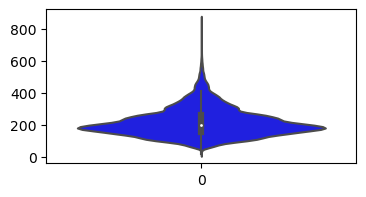

In [77]:
dist('mths_since_earliest_cr_line')

In [78]:
datawoe['mths_since_earliest_cr_line_woe'] = pd.cut(datawoe['mths_since_earliest_cr_line'],10)
woe(datawoe, 'mths_since_earliest_cr_line_woe')

,mths_since_earliest_cr_line_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(779.2, 864.0]",10,0.000000,-9.872783,0.535397
1,"(694.4, 779.2]",29,0.172414,-8.808032,0.535397
2,"(609.6, 694.4]",327,0.110092,-6.384728,0.535397
3,"(524.8, 609.6]",2092,0.107553,-4.525018,0.535397
4,"(440.0, 524.8]",7983,0.084930,-3.173052,0.535397
5,"(15.152, 100.8]",24233,0.166632,-2.026550,0.535397
6,"(355.2, 440.0]",24560,0.088233,-2.012406,0.535397
7,"(270.4, 355.2]",65592,0.093990,-0.932580,0.535397
8,"(185.6, 270.4]",168174,0.105492,0.304696,0.535397
9,"(100.8, 185.6]",173285,0.121944,0.351927,0.535397


Month Since Last Payment

number of unique values : 97
Distribution :
count    466285.000000
mean          4.304464
std           8.993111
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          96.000000
Name: mths_since_last_pymnt, dtype: float64


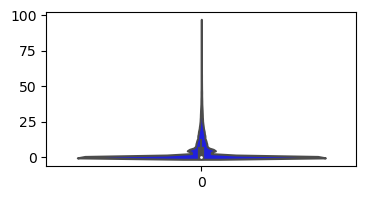

In [79]:
dist('mths_since_last_pymnt')

In [80]:
datawoe['mths_since_last_pymnt_woe'] = pd.cut(datawoe['mths_since_last_pymnt'],10)
woe(datawoe, 'mths_since_last_pymnt_woe')

,mths_since_last_pymnt_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(86.4, 96.0]",107,0.859813,-9.361578,2.473781
1,"(76.8, 86.4]",207,0.801932,-8.701474,2.473781
2,"(67.2, 76.8]",354,0.646893,-8.164580,2.473781
3,"(57.6, 67.2]",904,0.398230,-7.225867,2.473781
4,"(48.0, 57.6]",1625,0.302769,-6.637883,2.473781
5,"(38.4, 48.0]",3572,0.218645,-5.846066,2.473781
6,"(28.8, 38.4]",8004,0.182034,-5.029626,2.473781
7,"(19.2, 28.8]",15339,0.168720,-4.363033,2.473781
8,"(9.6, 19.2]",40971,0.159894,-3.322048,2.473781
9,"(-0.096, 9.6]",395202,0.099873,0.733464,2.473781


Month To Next Payment

number of unique values : 104
Distribution :
count    466285.000000
mean          5.291178
std           9.435500
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         106.000000
Name: mths_to_next_pymnt, dtype: float64


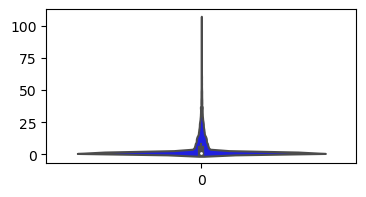

In [81]:
dist('mths_to_next_pymnt')

In [82]:
datawoe['mths_to_next_pymnt_woe'] = pd.cut(datawoe['mths_to_next_pymnt'],10)
woe(datawoe, 'mths_to_next_pymnt_woe')

,mths_to_next_pymnt_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(95.4, 106.0]",46,0.000000,-10.175278,2.428714
1,"(84.8, 95.4]",63,0.111111,-9.860748,2.428714
2,"(74.2, 84.8]",203,0.241379,-8.690377,2.428714
3,"(63.6, 74.2]",755,0.190728,-7.375680,2.428714
4,"(53.0, 63.6]",1775,0.151549,-6.518649,2.428714
5,"(42.4, 53.0]",3564,0.188833,-5.817707,2.428714
6,"(31.8, 42.4]",8189,0.229820,-4.975753,2.428714
7,"(21.2, 31.8]",16419,0.258968,-4.261977,2.428714
8,"(10.6, 21.2]",41899,0.215280,-3.266847,2.428714
9,"(-0.106, 10.6]",393372,0.091237,0.734023,2.428714


Payment time

number of unique values : 107
Distribution :
count    466285.000000
mean          9.396513
std          12.588399
min         -85.000000
25%           1.000000
50%           2.000000
75%          14.000000
max          98.000000
Name: pymnt_time, dtype: float64


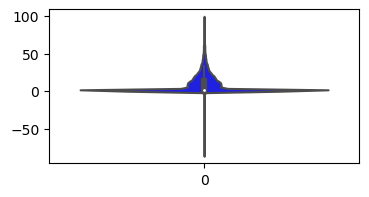

In [83]:
dist('pymnt_time')

In [84]:
datawoe['pymnt_time_fc'] = np.where((datawoe['pymnt_time']>=0)&(datawoe['pymnt_time']<=1),0,
                               np.where((datawoe['pymnt_time']>1)&(datawoe['pymnt_time']<=6),1,
                               np.where((datawoe['pymnt_time']>6)&(datawoe['pymnt_time']<=12),2,3)))
woe(datawoe,'pymnt_time_fc')

,pymnt_time_fc,num_observation,good_loan_prob,weight_of_evidence,information_value
0,2,60890,0.201905,-1.019231,0.276267
1,1,86213,0.110505,-0.606978,0.276267
2,3,129430,0.224809,-0.079950,0.276267
3,0,189752,0.006682,0.499950,0.276267


From Numerical Features we will drop useless, weak, and suspicious features. Thus, we will drop:<br>
'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'total_rec_late_fee', 'recoveries', 'acc_now_delinq', <br>'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_last_delinq', 'mths_since_earliest_cr_line', 'mths_since_last_pymnt', 'mths_to_next_pymnt'.

In [85]:
dataiv = datafe.copy()

In [86]:
# Drop categorical features
dataiv.drop(['id', 'term', 'emp_length', 'verification_status', 'purpose'], axis=1, inplace=True)

# Drop numerical features
dataiv.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'mths_since_earliest_cr_line',
             'total_rec_late_fee', 'recoveries', 'acc_now_delinq', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
             'mths_since_last_delinq', 'mths_since_last_pymnt', 'mths_to_next_pymnt'], axis=1, inplace=True)

In [87]:
dataiv.columns

Index(['loan_amnt', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'loan_status', 'dti', 'total_acc', 'initial_list_status',
       'last_pymnt_amnt', 'pymnt_time'],
      dtype='object')

In [88]:
dataencod = dataiv.copy()

In [89]:
dataencod.shape

(466285, 11)

### FEATURE ENCODING

In [90]:
dataencod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   int_rate             466285 non-null  float64
 2   grade                466285 non-null  object 
 3   home_ownership       466285 non-null  object 
 4   annual_inc           466285 non-null  float64
 5   loan_status          466285 non-null  int64  
 6   dti                  466285 non-null  float64
 7   total_acc            466285 non-null  float64
 8   initial_list_status  466285 non-null  object 
 9   last_pymnt_amnt      466285 non-null  float64
 10  pymnt_time           466285 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 39.1+ MB


In [91]:
initial_map                      = {'f' : 0, 'w' : 1}
dataencod['initial_list_status'] = dataencod['initial_list_status'].map(initial_map)

In [92]:
home_map                    = {'MORTGAGE' : 'mortgage', 'OWN'  : 'own', 'RENT'     : 'rent',
                               'OTHER'    : 'other', 'ANY'      : 'other', 'NONE'     : 'other'}
dataencod['home_ownership'] = dataencod['home_ownership'].map(home_map)

In [93]:
home_encod = pd.get_dummies(dataencod['home_ownership'], prefix='home_ownership')
dataencod.drop('home_ownership', axis=1, inplace=True)

In [94]:
grade_encod = pd.get_dummies(dataencod['grade'], prefix='grade')
dataencod.drop('grade', axis=1, inplace=True)

In [95]:
dataencod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   int_rate             466285 non-null  float64
 2   annual_inc           466285 non-null  float64
 3   loan_status          466285 non-null  int64  
 4   dti                  466285 non-null  float64
 5   total_acc            466285 non-null  float64
 6   initial_list_status  466285 non-null  int64  
 7   last_pymnt_amnt      466285 non-null  float64
 8   pymnt_time           466285 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 32.0 MB


In [96]:
databin = dataencod.copy()

### FEATURE BINNING

In [97]:
bin_column = databin.columns

In [98]:
bin_column

Index(['loan_amnt', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt', 'pymnt_time'],
      dtype='object')

In [99]:
manual_bin      = ['annual_inc', 'last_pymnt_amnt', 'pymnt_time', 'loan_status']
auto_bin        = bin_column.drop(manual_bin)
feat_manual_bin = databin[manual_bin]
feat_auto_bin   = databin[auto_bin]

In [100]:
# Define function
def make_bins(df, feature, cut):
    df[feature] = pd.cut(df[feature],cut)
    return df

In [101]:
feat_auto_bin.columns

Index(['loan_amnt', 'int_rate', 'dti', 'total_acc', 'initial_list_status'], dtype='object')

In [102]:
# loan amnt
loan_amnt     = make_bins(feat_auto_bin, 'loan_amnt',10)
loan_amnt_dum = pd.get_dummies(loan_amnt['loan_amnt'], prefix='loan_amnt')

# int_rate
int_rate      = make_bins(feat_auto_bin, 'int_rate',10)
int_rate_dum  = pd.get_dummies(int_rate['int_rate'], prefix='int_rate')

# dti
dti           = make_bins(feat_auto_bin, 'dti', 10)
dti_dum       = pd.get_dummies(dti['dti'], prefix='dti')

# total_acc
total_acc     = make_bins(feat_auto_bin, 'total_acc', 7)
total_acc_dum = pd.get_dummies(total_acc['total_acc'], prefix='total_acc')

In [103]:
num_auto_bin  = pd.concat([loan_amnt_dum, int_rate_dum, dti_dum, total_acc_dum],axis=1)

In [104]:
feat_manual_bin.columns

Index(['annual_inc', 'last_pymnt_amnt', 'pymnt_time', 'loan_status'], dtype='object')

In [105]:
# annual_inc
feat_manual_bin['annual_inc_(low income)']      = np.where((feat_manual_bin['annual_inc']>=0)&(feat_manual_bin['annual_inc']<=50000),1,0)
feat_manual_bin['annual_inc_(mid income)']      = np.where((feat_manual_bin['annual_inc']>50000)&(feat_manual_bin['annual_inc']<=200000),1,0)
feat_manual_bin['annual_inc_(high income)']     = np.where((feat_manual_bin['annual_inc']>200000),1,0)

# last_pymnt_amnt
feat_manual_bin['last_pymnt_amnt_(0,500)']      = np.where((feat_manual_bin['last_pymnt_amnt']>=0)&(feat_manual_bin['last_pymnt_amnt']<=500),1,0)
feat_manual_bin['last_pymnt_amnt_(500, 1000)']  = np.where((feat_manual_bin['last_pymnt_amnt']>500)&(feat_manual_bin['last_pymnt_amnt']<=1000),1,0)
feat_manual_bin['last_pymnt_amnt_(1000, 1500)'] = np.where((feat_manual_bin['last_pymnt_amnt']>1000)&(feat_manual_bin['last_pymnt_amnt']<=1500),1,0)
feat_manual_bin['last_pymnt_amnt_(1500, 3500)'] = np.where((feat_manual_bin['last_pymnt_amnt']>1500)&(feat_manual_bin['last_pymnt_amnt']<=3500),1,0)
feat_manual_bin['last_pymnt_amnt_(> 3500)']     = np.where((feat_manual_bin['last_pymnt_amnt']>3500),1,0)

# pymnt_time
feat_manual_bin['pymnt_time_(0, 1)']            = np.where((feat_manual_bin['pymnt_time']>=0)&(feat_manual_bin['pymnt_time']<=1),1,0)
feat_manual_bin['pymnt_time_(1, 6)']            = np.where((feat_manual_bin['pymnt_time']>1)&(feat_manual_bin['pymnt_time']<=6),1,0)
feat_manual_bin['pymnt_time_(6, 12)']           = np.where((feat_manual_bin['pymnt_time']>6)&(feat_manual_bin['pymnt_time']<=12),1,0)
feat_manual_bin['pymnt_time_(> 12)']            = np.where((feat_manual_bin['pymnt_time']>12),1,0)

#Drop orginial Feature
feat_manual_bin = feat_manual_bin.drop(manual_bin, axis=1)

In [106]:
dataencoded = pd.concat([grade_encod, home_encod, num_auto_bin, feat_manual_bin, dataencod['initial_list_status'], dataencod['loan_status']],axis = 1)

In [107]:
dataencoded.shape

(466285, 62)

In [108]:
dataencoded.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_mortgage,home_ownership_other,home_ownership_own,home_ownership_rent,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]",annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),initial_list_status,loan_status
0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


## MODELING

In [109]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
import itertools

In [110]:
datamod = dataencoded.copy()

In [111]:
X = datamod.drop(['loan_status'], axis=1)
y = datamod['loan_status']

In [112]:
#Split Dataset 70% Train : 30% Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((326399, 61), (139886, 61), (326399,), (139886,))

In [113]:
# Handle Imbalance Target Using SMOTE
sm = SMOTE(random_state=42)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_smote.shape, X_train.shape, y_smote.shape, y_train.shape

((579926, 61), (326399, 61), (579926,), (326399,))

In [114]:
y_smote.value_counts()

1    289963
0    289963
Name: loan_status, dtype: int64

### TRAINING MODEL

In [115]:
# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_smote, y_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
y_pred_proba_train = logreg.predict_proba(X_train)[:][:,1]
y_pred_proba_test = logreg.predict_proba(X_test)[:][:,1]
y_pred_class = []
for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print('Model Evaluation Results:')
print(f'Accuracy        : {accuracy:.4f}')
print(f'ROC-AUC Score   : {roc_auc:.4f}')
print(f'AUC Train Proba : {roc_auc_score(y_train, y_pred_proba_train):.4f}')
print(f'AUC Test Proba  : {roc_auc_score(y_test, y_pred_proba_test):.4f}')
print(classification_report(y_test, y_pred_class))

Model Evaluation Results:
Accuracy        : 0.9109
ROC-AUC Score   : 0.8537
AUC Train Proba : 0.9474
AUC Test Proba  : 0.9469
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    124136
           1       0.58      0.78      0.66     15750

    accuracy                           0.91    139886
   macro avg       0.77      0.85      0.81    139886
weighted avg       0.93      0.91      0.92    139886



### CONFUSION MATRIX

In [ ]:
# Define c_matrix_plot() function
def c_matrix_plot(y_test, y_pred):

    c_matrix = confusion_matrix(y_test, y_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    ax = sns.heatmap(c_matrix, annot = labels, fmt = '', cmap = 'mako')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['Not Default', 'Default'])
    ax.yaxis.set_ticklabels(['Not Default', 'Default'])
    plt.show()

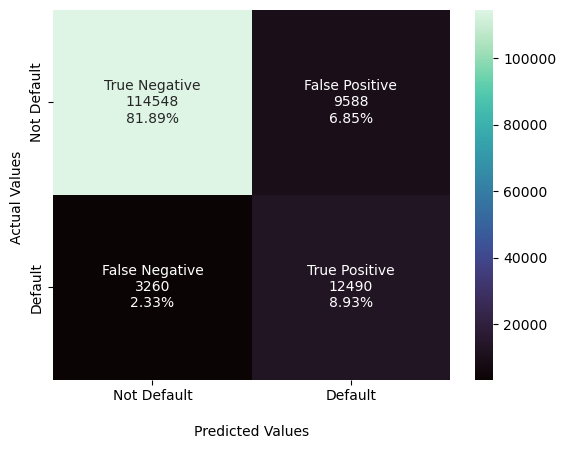

In [ ]:
c_matrix_plot(y_test, y_pred)

### HYPER PARAMETER TUNING

In [116]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}


### RETRAINING MODEL WITH THE BEST PARAMETER

In [159]:
# Initialize the logistic regression model with the best hyperparameters from tuning
logreg = LogisticRegression(C=0.1, penalty='l2', class_weight=None, random_state=42)

# Train the logistic regression model using the tuned hyperparameters
logreg.fit(X_smote, y_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
y_pred_proba_train = logreg.predict_proba(X_train)[:, 1]
y_pred_proba_test = logreg.predict_proba(X_test)[:, 1]
y_pred_class = (y_pred_proba_test > 0.5).astype(int)

print('Model Evaluation Results:')
print(f'Accuracy        : {accuracy:.4f}')
print(f'ROC-AUC Score   : {roc_auc:.4f}')
print(f'AUC Train Proba : {roc_auc_score(y_train, y_pred_proba_train):.4f}')
print(f'AUC Test Proba  : {roc_auc_score(y_test, y_pred_proba_test):.4f}')
print(classification_report(y_test, y_pred_class))

Model Evaluation Results:
Accuracy        : 0.9082
ROC-AUC Score   : 0.8579
AUC Train Proba : 0.9478
AUC Test Proba  : 0.9473
              precision    recall  f1-score   support

           0       0.97      0.92      0.95    124136
           1       0.57      0.79      0.66     15750

    accuracy                           0.91    139886
   macro avg       0.77      0.86      0.80    139886
weighted avg       0.93      0.91      0.91    139886



In [160]:
import joblib

# Save the trained model using joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')

print('Trained model saved as logistic_regression_model.pkl')

Trained model saved as logistic_regression_model.pkl


## COEFFICIENT VALUES

In [120]:
import statsmodels.api as sm
X_const   = sm.add_constant(X_smote)
logit     = sm.Logit(y_smote, X_const)
logit_fit = logit.fit(method='bfgs')
print(logit_fit.summary())

         Current function value: 0.231655
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


c:\Users\lanafuadi\anaconda3\envs\works\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               579926
Model:                          Logit   Df Residuals:                   579864
Method:                           MLE   Df Model:                           61
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.6658
Time:                        06:36:48   Log-Likelihood:            -1.3434e+05
converged:                      False   LL-Null:                   -4.0197e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.9908      0.083     24.061      0.000       1.829       2.153
grade_A                         -1.4287      0.056    -25.293      0.000     

### PROBABILITY CONTRIBUTION

In [121]:
# Converting statsmodels summary object to Pandas Dataframe,
data_importance = pd.read_html(logit_fit.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in data_importance['coef']:
    if i == 0 :
        data_importance['odds_ratio'] = 0
    else:
        data_importance['odds_ratio'] = np.exp(data_importance['coef'])
        
# show probability contribution
data_importance[data_importance['P>|z|'] <= 0.05].sort_values('odds_ratio',ascending = False)

,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
"last_pymnt_amnt_(0,500)",3.0547,0.029,107.011,0.000,2.999,3.111,21.214820
const,1.9908,0.083,24.061,0.000,1.829,2.153,7.321389
"last_pymnt_amnt_(500, 1000)",1.9411,0.028,70.040,0.000,1.887,1.995,6.966410
"loan_amnt_(31550.0, 35000.0]",1.0913,0.037,29.754,0.000,1.019,1.163,2.978143
"last_pymnt_amnt_(1000, 1500)",0.9742,0.037,26.092,0.000,0.901,1.047,2.649047
pymnt_time_(> 12),0.9187,0.024,38.207,0.000,0.872,0.966,2.506030
"int_rate_(23.996, 26.06]",0.7041,0.067,10.463,0.000,0.572,0.836,2.022026
grade_F,0.4611,0.058,7.944,0.000,0.347,0.575,1.585817
grade_G,0.3590,0.090,3.989,0.000,0.183,0.535,1.431897
annual_inc_(low income),0.3560,0.036,9.954,0.000,0.286,0.426,1.427608


### ROC CURVE

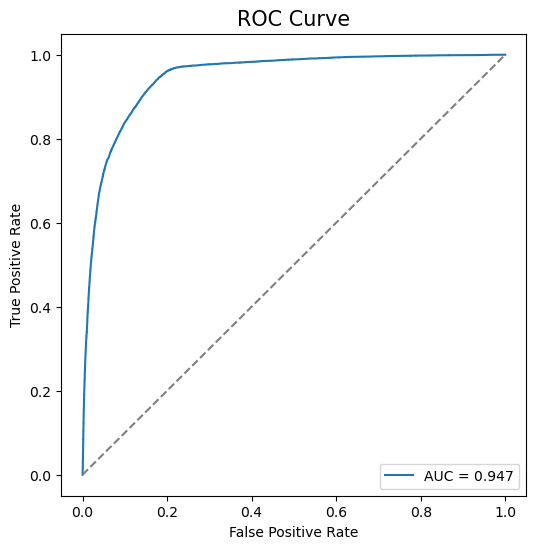

In [122]:
fpr, tpr, tr = roc_curve(y_test, y_pred_proba_test)
auc = roc_auc_score(y_test, y_pred_proba_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

### KOLMOGOROV-SMIRNOV CURVE

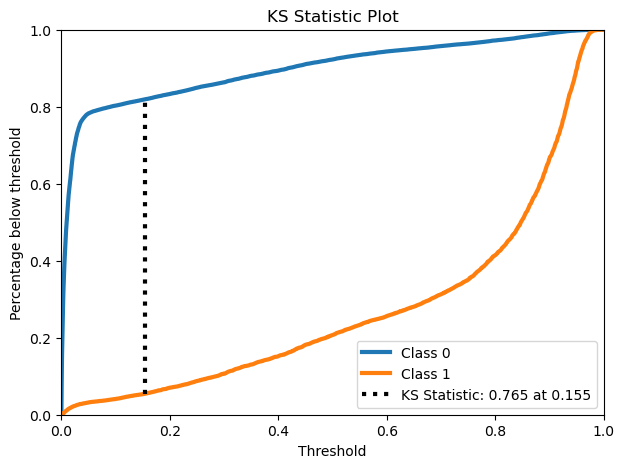

In [123]:
import scikitplot as skplt
y_pred_proba = logreg.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

The KS statistic achieved a value of 0.765, which is a relatively high value and indicates good model performance.

In [124]:
# Set new index
data_importance = data_importance.reset_index()

# Rename columns
data_importance = data_importance.rename(columns = {'index' : 'feature'})

# Create new columns feature_name 
data_importance['feature_name']      = data_importance['feature'].str.split('_').str[:-1]
data_importance['feature_name']      = data_importance['feature_name'].str.join('_')
data_importance.at[0,'feature_name'] ='intercept'
data_importance

,feature,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio,feature_name
0,const,1.990800,0.083,2.406100e+01,0.000,1.829,2.153,7.321389,intercept
1,grade_A,-1.428700,0.056,-2.529300e+01,0.000,-1.539,-1.318,0.239620,grade
2,grade_B,-0.470800,0.037,-1.289600e+01,0.000,-0.542,-0.399,0.624502,grade
3,grade_C,-0.023200,0.034,-6.840000e-01,0.494,-0.090,0.043,0.977067,grade
4,grade_D,0.293100,0.035,8.376000e+00,0.000,0.225,0.362,1.340577,grade
5,grade_E,0.153000,0.041,3.751000e+00,0.000,0.073,0.233,1.165325,grade
6,grade_F,0.461100,0.058,7.944000e+00,0.000,0.347,0.575,1.585817,grade
7,grade_G,0.359000,0.090,3.989000e+00,0.000,0.183,0.535,1.431897,grade
8,home_ownership_mortgage,-0.413200,0.029,-1.409500e+01,0.000,-0.471,-0.356,0.661530,home_ownership
9,home_ownership_other,-0.061100,0.268,-2.280000e-01,0.820,-0.586,0.464,0.940729,home_ownership


In [125]:
# copy dataset
data_scorecard = data_importance.copy()

# define max and min score
min_score = 300
max_score = 850

# aggregate min and sum
min_sum_coef                           = data_scorecard.groupby('feature_name')['coef'].min().sum()

# aggregate max and sum
max_sum_coef                           = data_scorecard.groupby('feature_name')['coef'].max().sum()

# define credit score
data_scorecard['Score_Calculation']    = data_scorecard['coef'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

# adjust intercept values
data_scorecard['Score_Calculation'][0] = ((data_scorecard['coef'][0] - min_sum_coef) / ((max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)

# round credit score
data_scorecard['Score_Final']          = data_scorecard['Score_Calculation'].round()

In [126]:
data_scorecard.sort_values('Score_Final',ascending = False).head(10)

,feature,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio,feature_name,Score_Calculation,Score_Final
0,const,1.9908,0.083,24.061,0.0,1.829,2.153,7.321389,intercept,724.253914,724.0
52,"last_pymnt_amnt_(0,500)",3.0547,0.029,107.011,0.0,2.999,3.111,21.214820,last_pymnt_amnt,59.167185,59.0
53,"last_pymnt_amnt_(500, 1000)",1.9411,0.028,70.040,0.0,1.887,1.995,6.966410,last_pymnt_amnt,37.597611,38.0
21,"loan_amnt_(31550.0, 35000.0]",1.0913,0.037,29.754,0.0,1.019,1.163,2.978143,loan_amnt,21.137640,21.0
54,"last_pymnt_amnt_(1000, 1500)",0.9742,0.037,26.092,0.0,0.901,1.047,2.649047,last_pymnt_amnt,18.869503,19.0
60,pymnt_time_(> 12),0.9187,0.024,38.207,0.0,0.872,0.966,2.506030,pymnt_time,17.794511,18.0
31,"int_rate_(23.996, 26.06]",0.7041,0.067,10.463,0.0,0.572,0.836,2.022026,int_rate,13.637874,14.0
6,grade_F,0.4611,0.058,7.944,0.0,0.347,0.575,1.585817,grade,8.931152,9.0
7,grade_G,0.3590,0.090,3.989,0.0,0.183,0.535,1.431897,grade,6.953553,7.0
49,annual_inc_(low income),0.3560,0.036,9.954,0.0,0.286,0.426,1.427608,annual_inc,6.895446,7.0


Text(0.5, 1.0, 'Top 10 High Score Features')

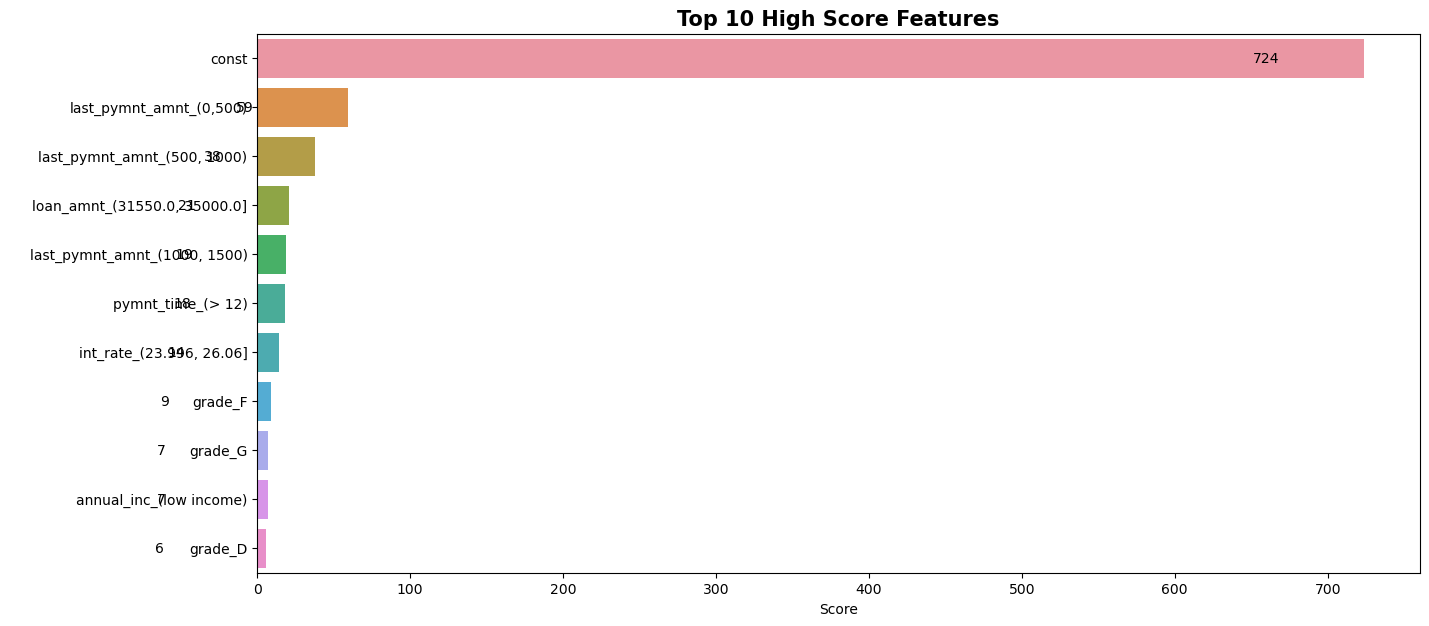

In [127]:
high_score= data_scorecard.sort_values('Score_Final',ascending = False).head(11)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Score_Final', y='feature', data=high_score)
plt.bar_label(ax.containers[0], padding=-80)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Top 10 High Score Features', fontsize=15, weight='extra bold')

Text(0.5, 1.0, 'Top 10 Low Score Features')

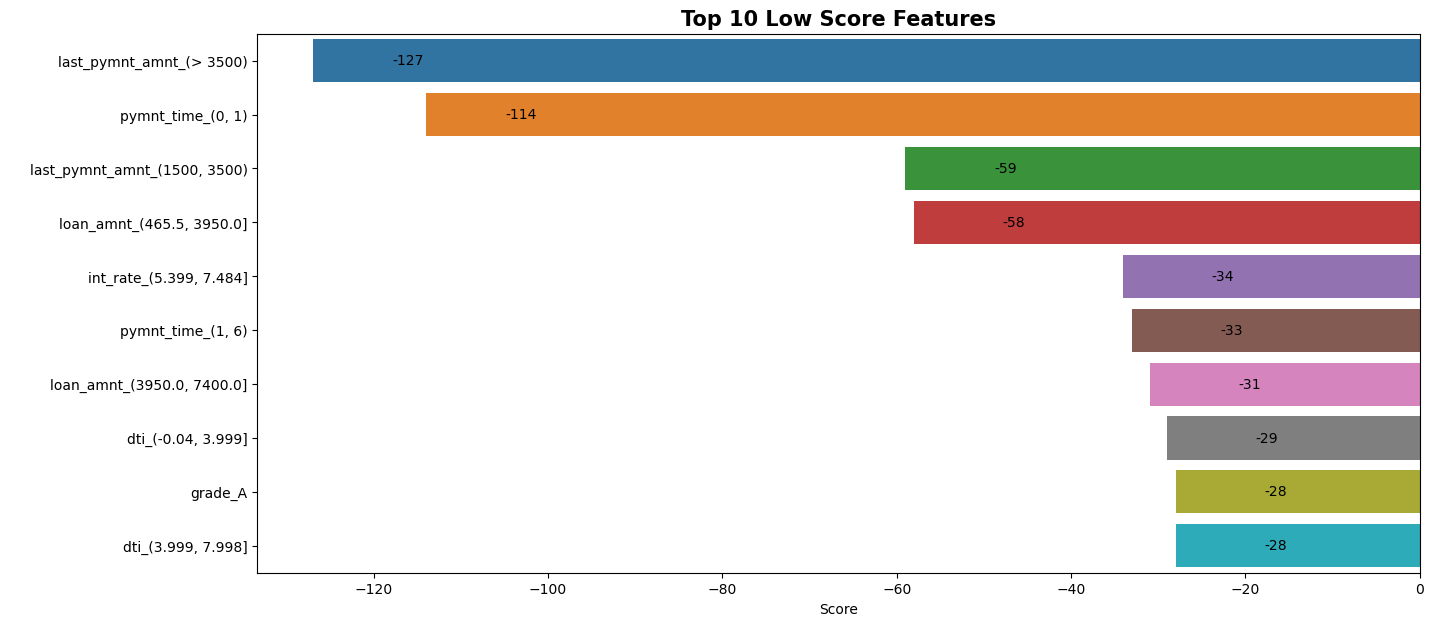

In [128]:
low_score= data_scorecard.sort_values('Score_Final',ascending = True).head(10)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Score_Final', y='feature', data=low_score)
plt.bar_label(ax.containers[0], padding=-80)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Top 10 Low Score Features', fontsize=15, weight='extra bold')

In [129]:
# define data
data_fico = datamod[X_smote.columns]
data_score = data_fico.copy()
data_score.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_mortgage,home_ownership_other,home_ownership_own,home_ownership_rent,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]",annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),initial_list_status
0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [130]:
print(data_score.shape)
print(data_score.size)


(466285, 61)
28443385


In [131]:
# Insert the 'Intercept' column with value 1 as the first column in df_score
data_score.insert(0, 'Intercept', 1)

scorecard_scores = data_scorecard['Score_Final']

# Reshape scorecard_scores to match the number of features in df_score
scorecard_scores = scorecard_scores.values.reshape(-1, 1)

# Calculate Score with matrix multiplication
y_scores = data_score.dot(scorecard_scores)

# Concatenate the scores to the original dataframe
score_card_df = pd.concat([data_score, y_scores], axis=1)

# Rename the last column to 'Credit Score'
score_card_df.rename(columns={0: 'credit_score'}, inplace=True)

In [132]:
score_card_df.head()

,Intercept,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_mortgage,home_ownership_other,home_ownership_own,home_ownership_rent,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]",annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),initial_list_status,credit_score
0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,724.0
1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,705.0
2,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,694.0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,750.0
4,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,565.0


In [133]:
# Merge Score To Original Dataframe with id
data_id = dataset[['id','member_id']].copy()
credit_scoreid = pd.merge(data_id, score_card_df, left_index = True, right_index = True)

In [134]:
credit_scoreid_sorted = credit_scoreid.sort_values(by='credit_score', ascending=False)
credit_scoreid_sorted.sample(5)

,id,member_id,Intercept,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_mortgage,home_ownership_other,home_ownership_own,home_ownership_rent,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]",annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),initial_list_status,credit_score
449081,11396619,13318817,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,718.0
459551,10555602,12437699,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,696.0
340685,22041396,24364338,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,705.0
208343,1413871,1663807,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,667.0
161983,3455551,4319215,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,692.0


In [135]:
member_credit_score = credit_scoreid[['id','member_id','credit_score']]

In [136]:
member_credit_score.sample(10)

,id,member_id,credit_score
270558,32179361,34792617,704.0
50562,9057964,10869914,613.0
234132,37297546,40040313,606.0
199939,1510365,1772150,738.0
198976,1504024,1765380,707.0
284580,30465504,33018674,642.0
50482,9706005,7859103,752.0
425353,11935661,13927817,574.0
334906,22542546,24885485,764.0
159596,3636047,4588273,732.0


In [137]:
member_credit_score.to_excel('member_credit_score.xlsx')

In [138]:
# Merge Score To Raw Dataframe 
credit_scoreid_only = credit_scoreid[['id','credit_score']]
df_result           = pd.merge(dataset,datafe[['id','pymnt_time']],on = 'id')
data_result         = pd.merge(df_result, credit_scoreid_only,on='id')

In [139]:
data_result.shape

(466285, 77)

In [140]:
data_result.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,pymnt_time,credit_score
80404,80404,7715983,9418061,12500,12500,12500.0,36 months,12.99,421.12,B,B4,Inside Sales,10+ years,MORTGAGE,45000.0,Not Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Good By Credit Cards,551xx,MN,18.61,0.0,Aug-00,0.0,NaN,NaN,7.0,0.0,10371,66.9,15.0,f,0.00,0.00,14319.96920,14319.97,12500.00,1819.97,0.0,0.0,0.0,Feb-15,8005.01,NaN,Feb-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,23718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15500.0,NaN,NaN,NaN,13,550.0
414812,414812,13468090,15520391,12000,12000,12000.0,36 months,18.25,435.34,D,D3,Director Perioperative Services,10+ years,RENT,146000.0,Source Verified,Apr-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,370xx,TN,12.86,0.0,Jan-03,0.0,27.0,72.0,10.0,2.0,14647,92.1,33.0,f,5799.46,5799.46,9142.14000,9142.14,6200.54,2941.60,0.0,0.0,0.0,Jan-16,435.34,Feb-16,Jan-16,0.0,55.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15900.0,NaN,NaN,NaN,1,621.0
85284,85284,7342620,9004492,16000,16000,15975.0,60 months,11.99,355.84,B,B3,Manager,2 years,RENT,68000.0,Source Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Consolidation Loan,925xx,CA,18.71,0.0,May-00,2.0,NaN,NaN,9.0,0.0,12254,38.5,38.0,f,0.00,0.00,17780.74130,17752.96,16000.00,1780.74,0.0,0.0,0.0,Oct-14,13875.62,NaN,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,256073.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31800.0,NaN,NaN,NaN,17,556.0
413898,413898,13408847,15461136,20000,20000,20000.0,36 months,7.90,625.81,A,A4,Director,3 years,RENT,75000.0,Verified,Apr-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,531xx,WI,17.01,1.0,Aug-99,0.0,19.0,NaN,12.0,0.0,11557,55.3,31.0,f,0.00,0.00,21682.56000,21682.56,20000.00,1682.56,0.0,0.0,0.0,Jul-15,12921.22,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,145761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20900.0,NaN,NaN,NaN,8,531.0
212975,212975,1350619,1595030,14000,14000,14000.0,36 months,13.67,476.25,B,B5,Cargill Incorporated,2 years,RENT,90000.0,Not Verified,Jun-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/10/12 > For paying off/...,debt_consolidation,Credit Card Consolidation/Debt Reduction,553xx,MN,14.02,1.0,Aug-87,1.0,22.0,NaN,12.0,0.0,29742,60.3,23.0,f,0.00,0.00,17144.41049,17144.41,14000.00,3144.41,0.0,0.0,0.0,Jun-15,477.26,NaN,Jun-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,711.0


## VISUAL ANALYSIS

In [141]:
datavis = data_result.copy()

### FICO CREDIT SCORING

| Fico Score        | Rating            | Description
|:-----------------:|:-----------------:|:------------------------------------------------------------------------------------------------------------------------------------------------: |
| 300 - 579         | Poor              | This credit score is much below the average score of U.S. consumers and demonstrates to lenders that the borrower may be a risk.                  |
| 580 - 669         | Fair              | This credit score is below the average score of U.S. consumers, though many lenders will approve loans with this score.                           |
| 670 - 739         | Good              | This credit score is near or slightly above the average of U.S. consumers and most lenders consider this a good score.                            |
| 740 - 799         | Very Good         | This credit score is above the average of U.S. consumers and demonstrates to lenders that the borrower is very dependable.                        |
| 800 - 850         | Exceptional       | This credit score is well above the average score of U.S. consumers and clearly demonstrates that the borrower is an exceptionally low risk.      |

source = https://www.myfico.com/credit-education/credit-scores

In [142]:
datavis['score_group'] = np.where((datavis['credit_score'] >= 280) & (datavis['credit_score'] < 580), 'Poor (300-579)',
                                  np.where((datavis['credit_score'] >= 580) & (datavis['credit_score'] < 670), 'Fair (580-669)',
                                           np.where((datavis['credit_score'] >= 670) & (datavis['credit_score'] < 740), 'Good (670-739)',
                                                    np.where((datavis['credit_score'] >= 740) & (datavis['credit_score'] < 800), 'Very Good (740-799)', 'Exceptional (800-850)'))))


In [143]:
score_groupby               = datavis.groupby(['score_group']).agg(num_cust = ('id','count')).reset_index()
score_groupby['percentage'] = round((score_groupby ['num_cust']/466285)*100, 2)
score_groupby               = score_groupby.sort_values('percentage',ascending = False)
score_groupby

,score_group,num_cust,percentage
1,Fair (580-669),211342,45.32
3,Poor (300-579),134015,28.74
2,Good (670-739),94795,20.33
4,Very Good (740-799),26084,5.59
0,Exceptional (800-850),49,0.01


[Text(0, 5, '45.32%'),
 Text(0, 5, '28.74%'),
 Text(0, 5, '20.33%'),
 Text(0, 5, '5.59%'),
 Text(0, 5, '0.01%')]

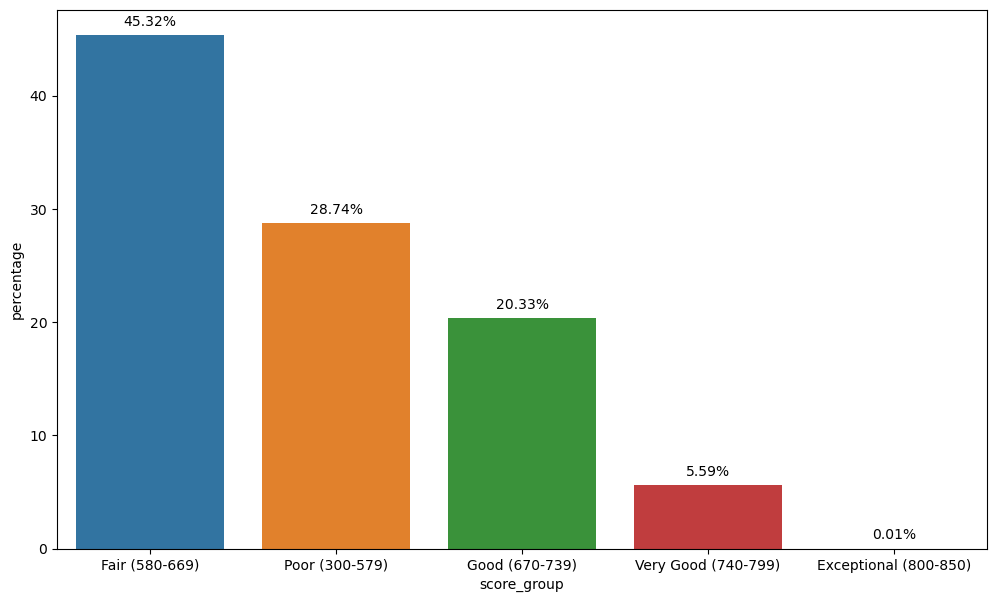

In [144]:
fig, ax       = plt.subplots(figsize=(12, 7))
sns.barplot(x = score_groupby['score_group'], y = score_groupby['percentage'],orient='v')
plt.bar_label(ax.containers[0], padding = 5, fmt='%.2f%%')

* 45.32% customers are Fair group with score in range of 580 to 669.<br>
* 28.74% customers are Poor group with score in range of 300 to 579. <br>
* 20.33% customers are Good group with score in range of 670 to 739. <br>
* 05.59% customers are Very Good group with score in range of 740 to 799. <br>
* only 00.01% customers are Excellent group with score 800 or more.

### Adjusting Label to Visualization

In [145]:
# Adjusting Label on loan_status
good_loan               = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
datavis['loan_status']  = np.where(datavis['loan_status'].isin(good_loan), 'Not Default', 'Default')

# Adjusting Label on loan_amnt
datavis['loan_amnt_fc'] = np.where((datavis['loan_amnt'] >= 465.5) & (datavis['loan_amnt'] < 3950), '465-3950',
                                   np.where((datavis['loan_amnt'] >= 3950) & (datavis['loan_amnt'] < 7400), '3950-7400',
                                            np.where((datavis['loan_amnt'] >= 7400.0) & (datavis['loan_amnt'] < 10850.0), '7400-10850',
                                                     np.where((datavis['loan_amnt'] >= 10850.0) & (datavis['loan_amnt'] < 14300.0), '10850-14300',
                                                              np.where((datavis['loan_amnt'] >= 14300.0) & (datavis['loan_amnt'] < 17750.0), '14300-17750',
                                                                       np.where((datavis['loan_amnt'] >= 17750.0) & (datavis['loan_amnt'] < 21200.0), '17750-21200',
                                                                                np.where((datavis['loan_amnt'] >= 21200.0) & (datavis['loan_amnt'] < 24650.0), '21200-24650',
                                                                                         np.where((datavis['loan_amnt'] >= 24650.0) & (datavis['loan_amnt'] < 28100.0), '24650-28100',
                                                                                                  np.where((datavis['loan_amnt'] >= 28100.0) & (datavis['loan_amnt'] < 31550.0), '28100-31550', '31550-35000')))))))))

# Adjusting Label on last_pymnt_amnt
datavis['last_pymnt_amnt_fc'] = np.where((datavis['last_pymnt_amnt'] >= 0) & (datavis['last_pymnt_amnt'] < 500), '0-500',
                                         np.where((datavis['last_pymnt_amnt'] >= 500) & (datavis['last_pymnt_amnt'] < 1000), '500-1000',
                                                  np.where((datavis['last_pymnt_amnt'] >= 1000) & (datavis['last_pymnt_amnt'] < 1500), '1000-1500',
                                                           np.where((datavis['last_pymnt_amnt'] >= 1500) & (datavis['last_pymnt_amnt'] < 3500), '1500-3500', '> 3500'))))

# Adjusting Label on pymnt_time
datavis['pymnt_time_fc'] = np.where((datavis['pymnt_time'] >= 0) & (datavis['pymnt_time'] <= 1), '1 Month',
                                    np.where((datavis['pymnt_time'] > 1) & (datavis['pymnt_time'] <= 6), '2-6 Month',
                                             np.where((datavis['pymnt_time'] > 6) & (datavis['pymnt_time'] <= 12), '7-12 Month', 'Over 1 Year')))

# Adjusting Label on int_rate
datavis['int_rate_fc'] = np.where((datavis['int_rate'] >= 5.399) & (datavis['int_rate'] < 7.484), '5.3-7.4',
                                  np.where((datavis['int_rate'] >= 7.484) & (datavis['int_rate'] < 9.548), '7.5-9.5',
                                           np.where((datavis['int_rate'] >= 9.548) & (datavis['int_rate'] < 11.612), '9.6-11.6',
                                                    np.where((datavis['int_rate'] >= 11.612) & (datavis['int_rate'] < 13.676), '11.7-13.6',
                                                             np.where((datavis['int_rate'] >= 13.676) & (datavis['int_rate'] < 15.74), '13.7-15.7',
                                                                      np.where((datavis['int_rate'] >= 15.74) & (datavis['int_rate'] < 17.804), '15.8-17.8',
                                                                               np.where((datavis['int_rate'] >= 17.804) & (datavis['int_rate'] < 19.868), '17.9-19.8',
                                                                                        np.where((datavis['int_rate'] >= 19.868) & (datavis['int_rate'] < 21.932), '19.9-21.9',
                                                                                                 np.where((datavis['int_rate'] >= 21.932) & (datavis['int_rate'] < 23.996), '22-23.9', '24-26')))))))))


#### Create Orderlist

In [146]:
order_list_loan       = ['465-3950','3950-7400','7400-10850','10850-14300','14300-17750','17750-21200','21200-24650','24650-28100','28100-31550','31550-35000']
order_list_last_pymnt = ['0-500','500-1000','1000-1500','1500-3500','> 3500']
order_list_pymnt_time = ['1 Month','2-6 Month','7-12 Month','Over 1 Year']
order_list_int        = ['5.3-7.4','7.5-9.5','9.6-11.6','11.7-13.6','13.7-15.7','15.8-17.8','17.9-19.8','19.9-21.9','22-23.9','24-26']
order_list_emp        = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

### Create Visual

### Loan Status

In [147]:
loan_status_groupby               = datavis.groupby(['loan_status']).agg(num_cust = ('id','count')).reset_index()
loan_status_groupby['percentage'] = round((loan_status_groupby ['num_cust']/466285)*100, 2)
loan_status_groupby               = loan_status_groupby.sort_values('percentage',ascending = False)
loan_status_groupby

,loan_status,num_cust,percentage
1,Not Default,414099,88.81
0,Default,52186,11.19


Text(0.5, 0, 'Loan Status')

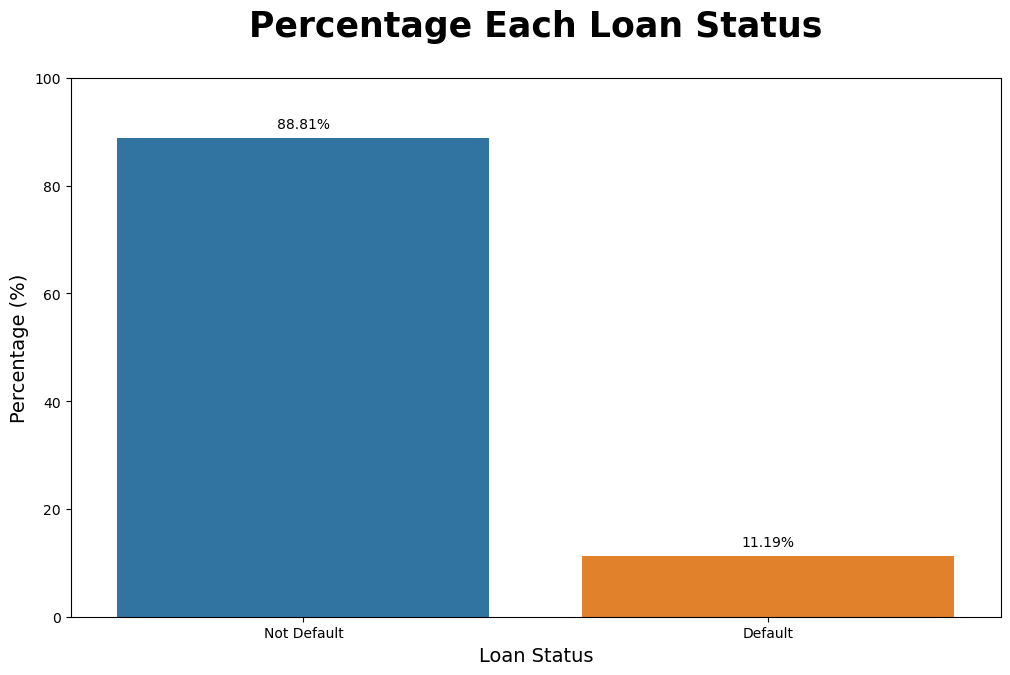

In [148]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = loan_status_groupby['loan_status'],y =loan_status_groupby['percentage'],orient='v')
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.title('Percentage Each Loan Status', 
          fontsize=25, weight='extra bold', pad=30)
plt.ylim(0,100)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('Loan Status', fontsize=14)

#### Customers Default by Loan Amount

In [149]:
datavis_loan                          = datavis.groupby(['score_group','loan_status','loan_amnt_fc']).agg(num_cust=('id','count')).reset_index()
total_cust_loan                       = datavis_loan.groupby(['loan_amnt_fc']).agg(total_cust=('num_cust','sum')).reset_index()
datavis_loan_group                    = datavis_loan.merge(total_cust_loan,on = ['loan_amnt_fc'])
default_loan_amt_rate                 = datavis_loan_group[datavis_loan_group['loan_status']=='Default']
default_loan_amt_rate['default_rate'] = round((default_loan_amt_rate['num_cust']/default_loan_amt_rate['total_cust'])*100, 2)
default_loan_amt_rate

,score_group,loan_status,loan_amnt_fc,num_cust,total_cust,default_rate
0,Exceptional (800-850),Default,28100-31550,1,13583,0.01
2,Fair (580-669),Default,28100-31550,127,13583,0.93
4,Good (670-739),Default,28100-31550,705,13583,5.19
6,Poor (300-579),Default,28100-31550,10,13583,0.07
8,Very Good (740-799),Default,28100-31550,927,13583,6.82
10,Exceptional (800-850),Default,31550-35000,37,21520,0.17
12,Fair (580-669),Default,31550-35000,159,21520,0.74
14,Good (670-739),Default,31550-35000,787,21520,3.66
16,Poor (300-579),Default,31550-35000,5,21520,0.02
18,Very Good (740-799),Default,31550-35000,1620,21520,7.53


Text(0.5, 0, 'Loan Amount')

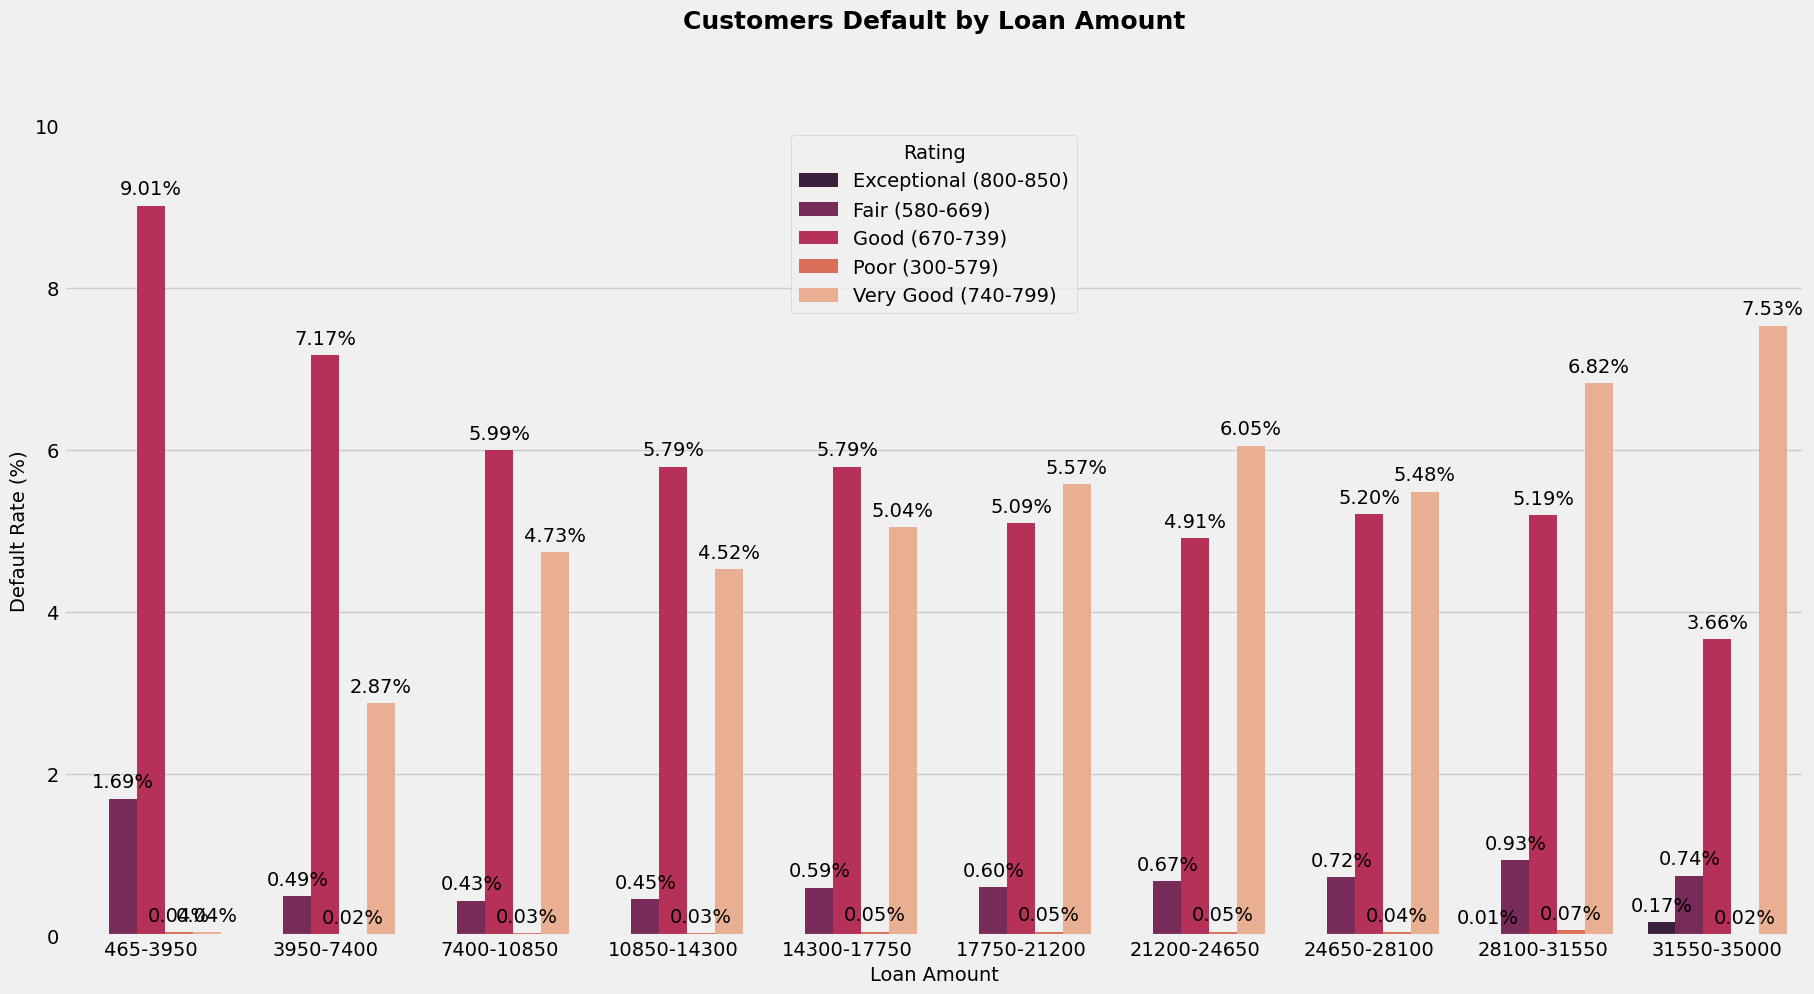

In [150]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x='loan_amnt_fc',y='default_rate',data=default_loan_amt_rate,palette='rocket', 
              hue='score_group',ci=None, order=order_list_loan)

plt.ylim(0,10)

plt.title('Customers Default by Loan Amount', 
          fontsize=18, weight='extra bold', pad=70)
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[2], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[3], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[4], padding=5,fmt='%.2f%%')

plt.legend(title='Rating', loc='upper center')
plt.ylabel('Default Rate (%)', fontsize=14)
plt.xlabel('Loan Amount', fontsize=14)

#### Customers Default by Last Payment Amount

In [151]:
datavis_payment                      = datavis.groupby(['score_group','loan_status','last_pymnt_amnt_fc']).agg(num_cust=('id','count')).reset_index()
total_cust_payment                   = datavis_payment.groupby(['last_pymnt_amnt_fc']).agg(total_cust=('num_cust','sum')).reset_index()
datavis_payment_group                = datavis_payment.merge(total_cust_payment,on = ['last_pymnt_amnt_fc'])
default_rate_payment                 = datavis_payment_group[datavis_payment_group['loan_status']=='Default']
default_rate_payment['default_rate'] = round((default_rate_payment['num_cust']/default_rate_payment['total_cust'])*100, 2)
default_rate_payment

,score_group,loan_status,last_pymnt_amnt_fc,num_cust,total_cust,default_rate
0,Exceptional (800-850),Default,0-500,35,215660,0.02
2,Fair (580-669),Default,0-500,1606,215660,0.74
4,Good (670-739),Default,0-500,18697,215660,8.67
6,Poor (300-579),Default,0-500,34,215660,0.02
8,Very Good (740-799),Default,0-500,14163,215660,6.57
10,Exceptional (800-850),Default,500-1000,3,98834,0.00
11,Fair (580-669),Default,500-1000,786,98834,0.80
13,Good (670-739),Default,500-1000,7909,98834,8.00
15,Poor (300-579),Default,500-1000,19,98834,0.02
17,Very Good (740-799),Default,500-1000,6567,98834,6.64


Text(0.5, 0, 'Last Payment Amount')

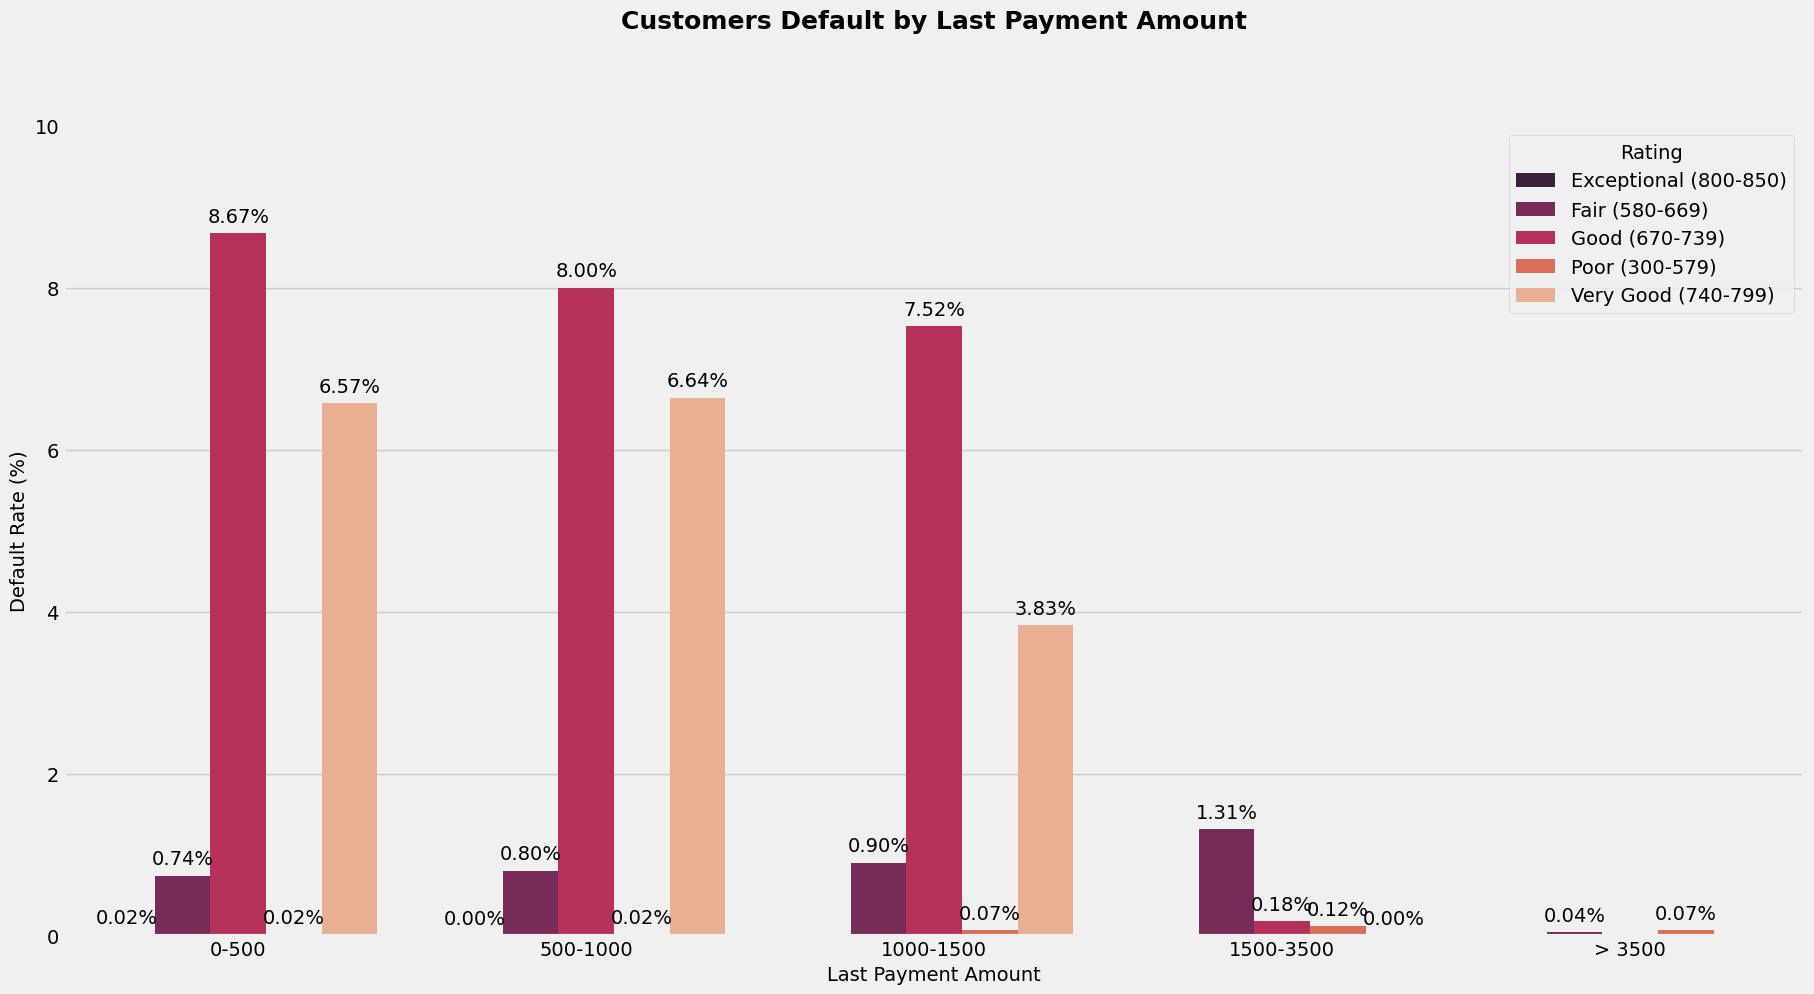

In [152]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x='last_pymnt_amnt_fc',y='default_rate',data=default_rate_payment,palette='rocket', 
              hue='score_group',ci=None, order=order_list_last_pymnt)

plt.ylim(0,10)

plt.title('Customers Default by Last Payment Amount', 
          fontsize=18, weight='extra bold', pad=70)
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[2], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[3], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[4], padding=5,fmt='%.2f%%')

plt.legend(title='Rating', loc='upper right')
plt.ylabel('Default Rate (%)', fontsize=14)
plt.xlabel('Last Payment Amount', fontsize=14)

#### Customers Default by Interest Rate

In [153]:
datavis_int                       = datavis.groupby(['score_group','loan_status','int_rate_fc']).agg(num_cust=('id','count')).reset_index()
total_cust_int                    = datavis_int.groupby(['int_rate_fc']).agg(total_cust=('num_cust','sum')).reset_index()
datavis_int_group                 = datavis_int.merge(total_cust_int,on = ['int_rate_fc'])
default_rate_int                  = datavis_int_group[datavis_int_group['loan_status']=='Default']
default_rate_int['default_rate']  = round((default_rate_int['num_cust']/default_rate_int['total_cust'])*100, 2)
default_rate_int

,score_group,loan_status,int_rate_fc,num_cust,total_cust,default_rate
0,Exceptional (800-850),Default,15.8-17.8,2,60358,0.00
2,Fair (580-669),Default,15.8-17.8,308,60358,0.51
4,Good (670-739),Default,15.8-17.8,3624,60358,6.00
6,Poor (300-579),Default,15.8-17.8,6,60358,0.01
8,Very Good (740-799),Default,15.8-17.8,5441,60358,9.01
10,Exceptional (800-850),Default,17.9-19.8,2,38003,0.01
12,Fair (580-669),Default,17.9-19.8,247,38003,0.65
14,Good (670-739),Default,17.9-19.8,2573,38003,6.77
16,Poor (300-579),Default,17.9-19.8,14,38003,0.04
18,Very Good (740-799),Default,17.9-19.8,4057,38003,10.68


Text(0.5, 0, 'Interest Rate (%)')

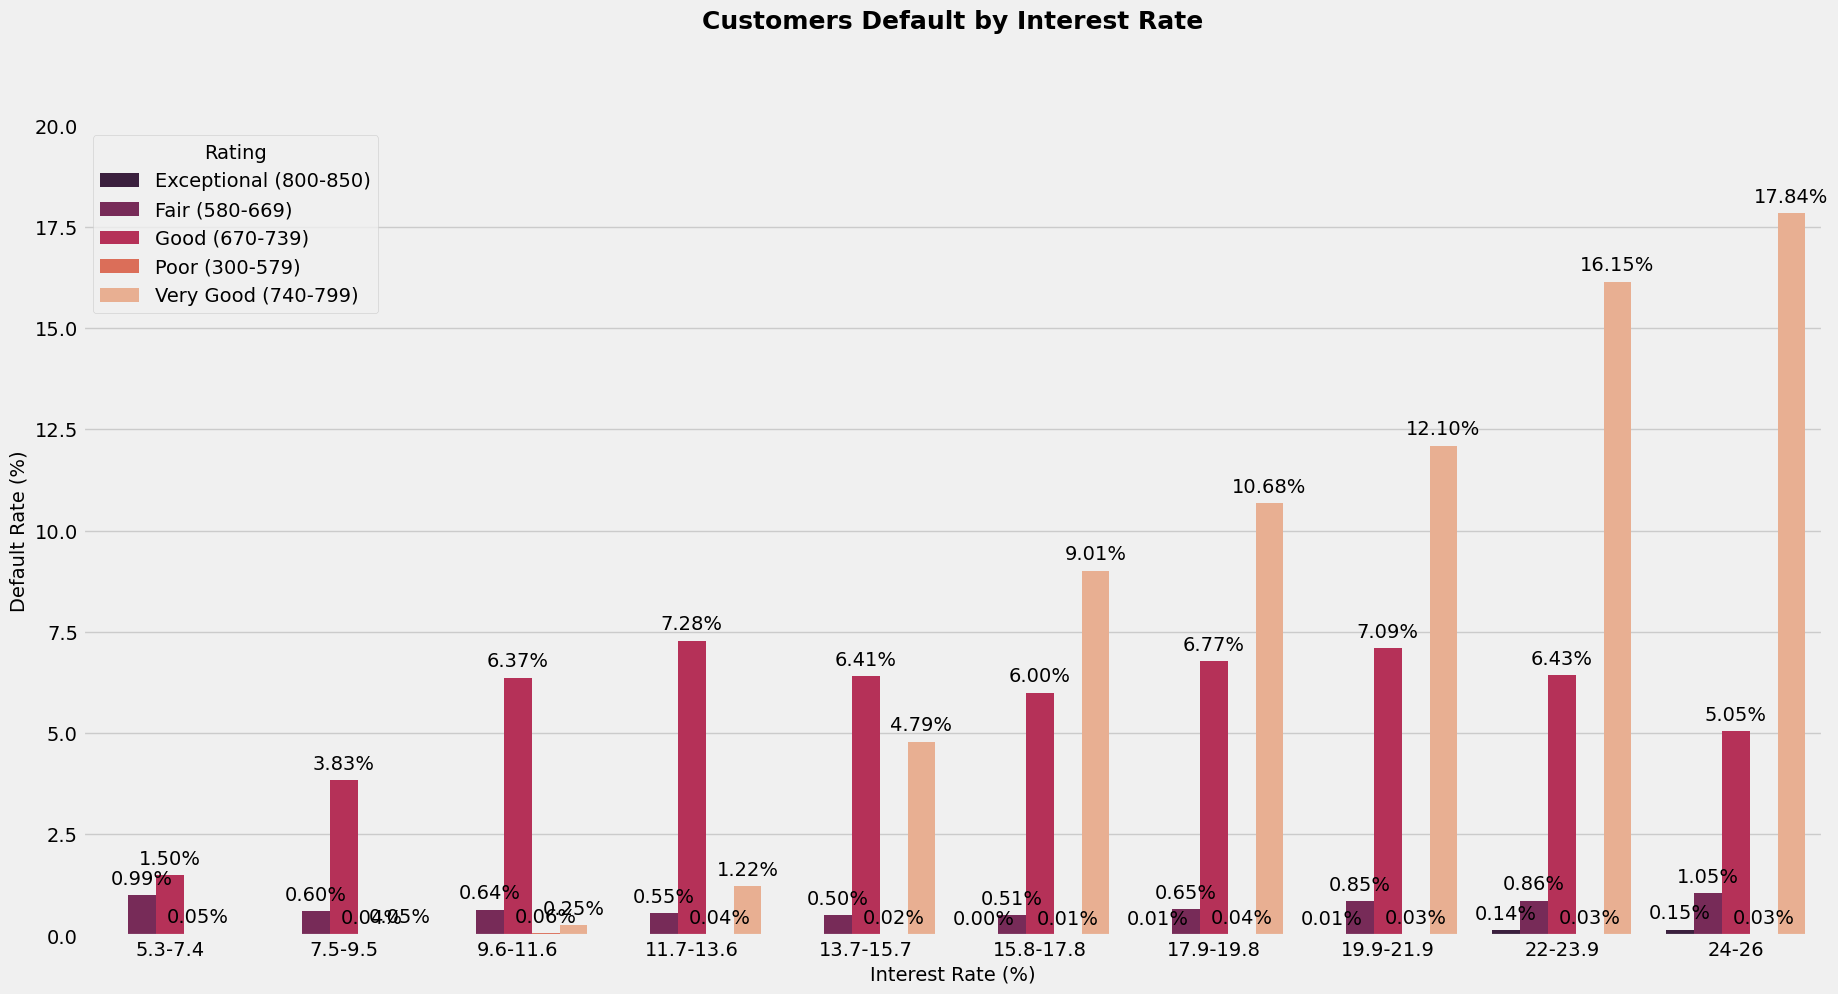

In [154]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x='int_rate_fc',y='default_rate',data=default_rate_int,palette='rocket', 
              hue='score_group',ci=None, order=order_list_int)

plt.ylim(0,20)

plt.title('Customers Default by Interest Rate', 
          fontsize=18, weight='extra bold', pad=70)
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[2], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[3], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[4], padding=5,fmt='%.2f%%')

plt.legend(title='Rating', loc='upper left')
plt.ylabel('Default Rate (%)', fontsize=14)
plt.xlabel('Interest Rate (%)', fontsize=14)

#### Customers Default by Payment Time

In [155]:
datavis_pymnt_time                       = datavis.groupby(['pymnt_time_fc','score_group','loan_status']).agg(num_cust=('id','count')).reset_index()
total_cust_pymnt                         = datavis_pymnt_time.groupby(['pymnt_time_fc']).agg(total_cust=('num_cust','sum')).reset_index()
datavis_pymnt_group                      = datavis_pymnt_time.merge(total_cust_pymnt,on = ['pymnt_time_fc'])
default_rate_pymnt_time                  = datavis_pymnt_group[datavis_pymnt_group['loan_status']=='Default']
default_rate_pymnt_time['default_rate']  = round((default_rate_pymnt_time['num_cust']/default_rate_pymnt_time['total_cust'])*100, 2)
default_rate_pymnt_time

,pymnt_time_fc,score_group,loan_status,num_cust,total_cust,default_rate
0,1 Month,Fair (580-669),Default,1192,189752,0.63
2,1 Month,Good (670-739),Default,2,189752,0.00
4,1 Month,Poor (300-579),Default,74,189752,0.04
6,2-6 Month,Fair (580-669),Default,1208,86213,1.40
8,2-6 Month,Good (670-739),Default,8231,86213,9.55
10,2-6 Month,Poor (300-579),Default,42,86213,0.05
12,2-6 Month,Very Good (740-799),Default,46,86213,0.05
14,7-12 Month,Exceptional (800-850),Default,2,60890,0.00
15,7-12 Month,Fair (580-669),Default,210,60890,0.34
17,7-12 Month,Good (670-739),Default,7993,60890,13.13


Text(0.5, 0, 'Payment Time')

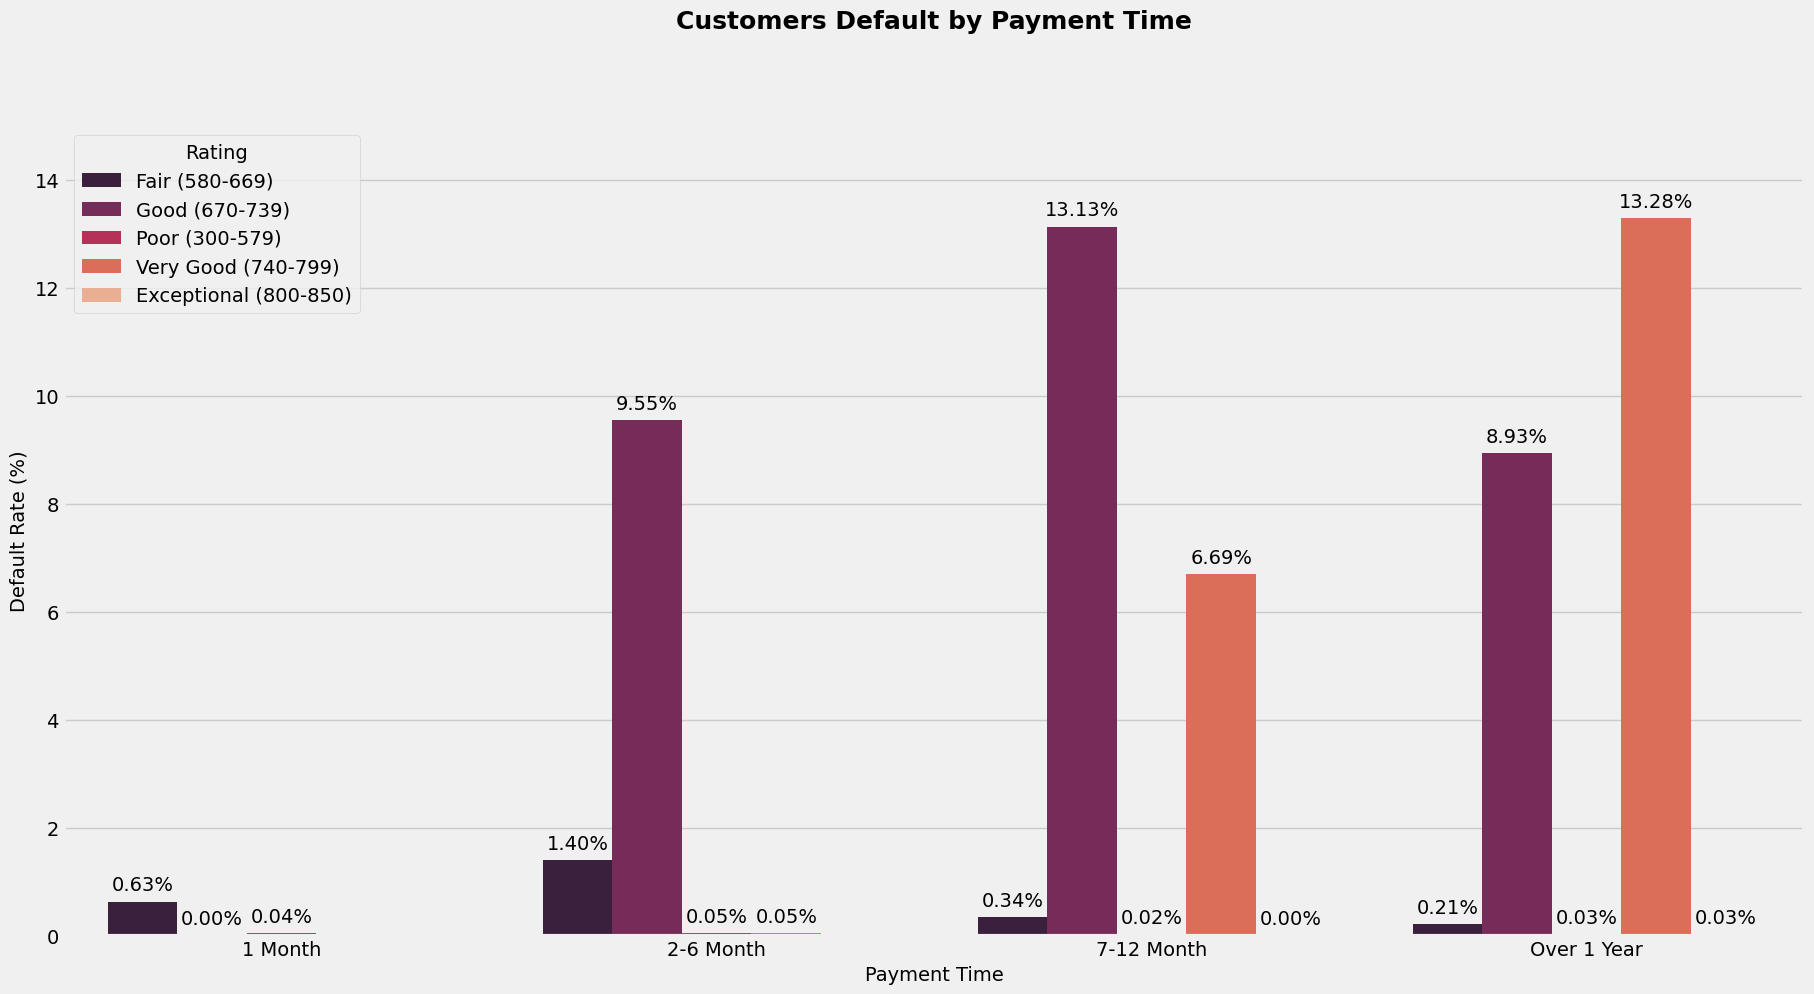

In [156]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x='pymnt_time_fc',y='default_rate',data=default_rate_pymnt_time,palette='rocket', 
              hue='score_group',ci=None, order=order_list_pymnt_time)

plt.ylim(0,15)

plt.title('Customers Default by Payment Time', 
          fontsize=18, weight='extra bold', pad=70)
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[2], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[3], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[4], padding=5,fmt='%.2f%%')

plt.legend(title='Rating', loc='upper left')
plt.ylabel('Default Rate (%)', fontsize=14)
plt.xlabel('Payment Time', fontsize=14)

#### Good Loan Rate Based On Employment Length

In [157]:
datavis_emp                      = datavis.groupby(['emp_length','score_group','loan_status']).agg(num_cust=('id','count')).reset_index()
total_cust_emp                   = datavis_emp.groupby(['emp_length']).agg(total_cust=('num_cust','sum')).reset_index()
datavis_emp_group                = datavis_emp.merge(total_cust_emp,on = ['emp_length'])
default_rate_emp                 = datavis_emp_group[datavis_emp_group['loan_status']=='Default']
default_rate_emp['default_rate'] = round((default_rate_emp['num_cust']/default_rate_emp['total_cust'])*100, 2)
default_rate_emp

,emp_length,score_group,loan_status,num_cust,total_cust,default_rate
0,1 year,Exceptional (800-850),Default,3,29622,0.01
1,1 year,Fair (580-669),Default,193,29622,0.65
3,1 year,Good (670-739),Default,1858,29622,6.27
5,1 year,Poor (300-579),Default,7,29622,0.02
7,1 year,Very Good (740-799),Default,1325,29622,4.47
9,10+ years,Exceptional (800-850),Default,13,150049,0.01
11,10+ years,Fair (580-669),Default,898,150049,0.60
13,10+ years,Good (670-739),Default,7975,150049,5.31
15,10+ years,Poor (300-579),Default,54,150049,0.04
17,10+ years,Very Good (740-799),Default,6385,150049,4.26


Text(0.5, 0, 'Employment Length')

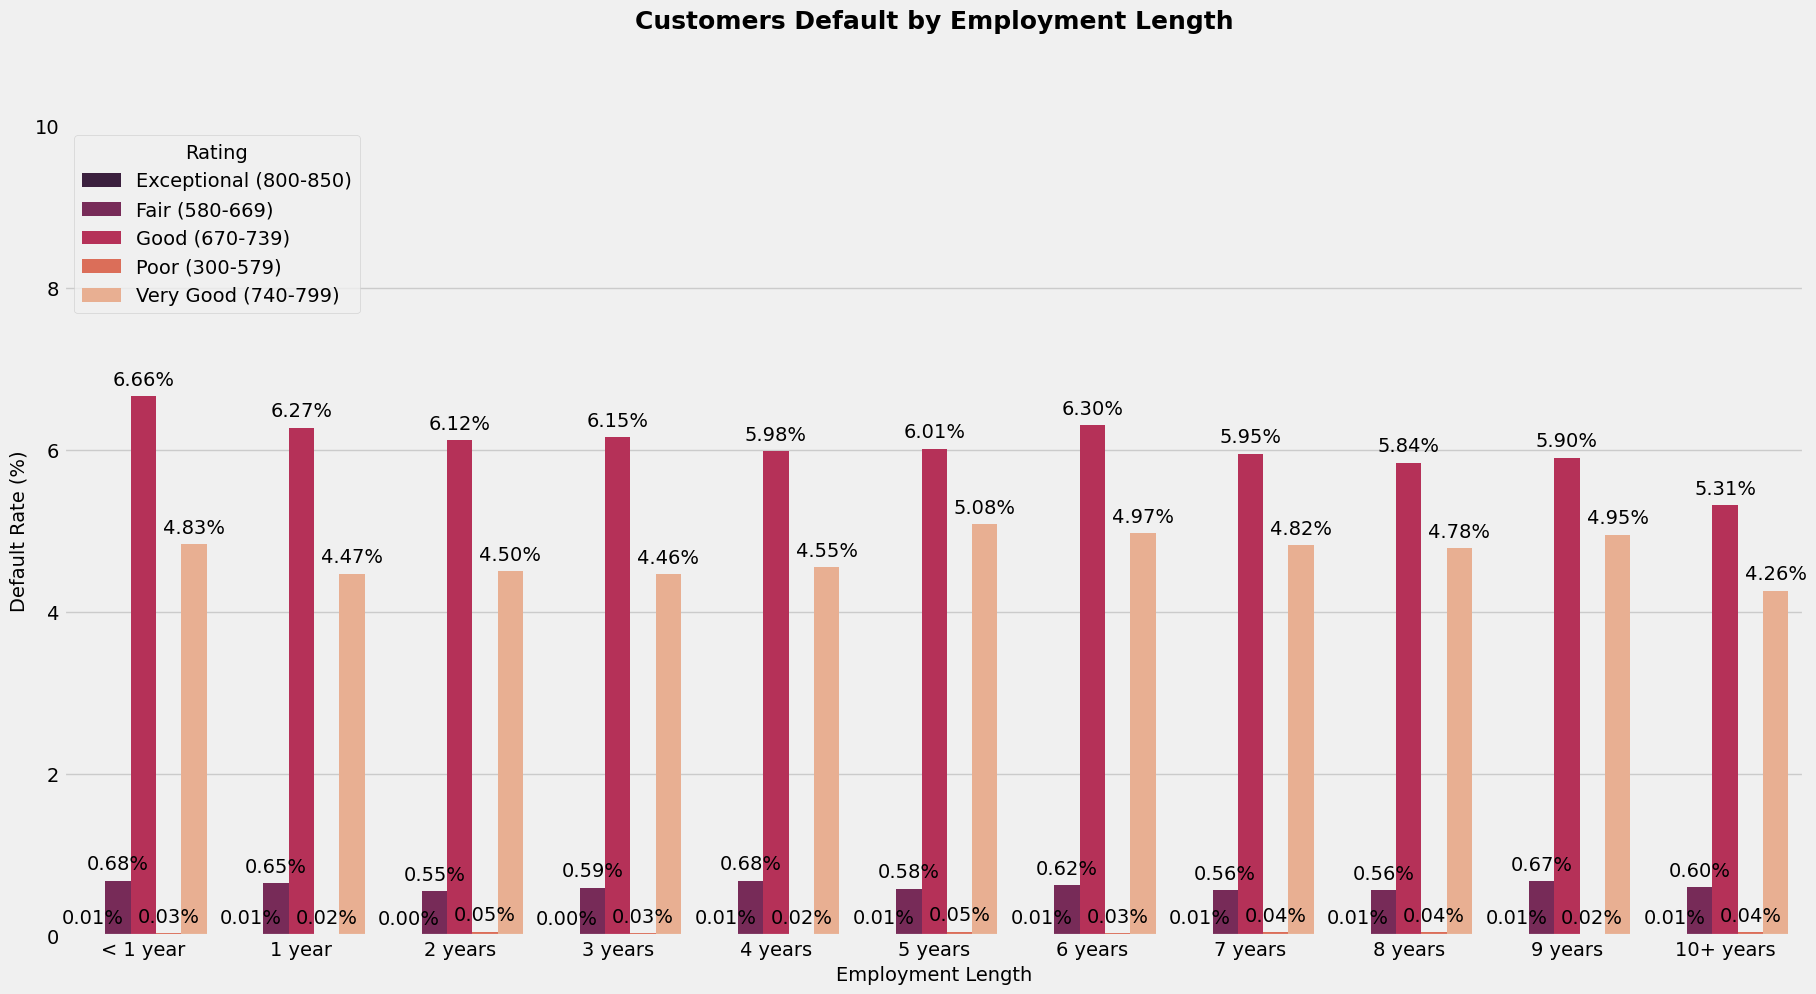

In [158]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x='emp_length',y='default_rate',data=default_rate_emp,palette='rocket', 
              hue='score_group',ci=None, order=order_list_emp)

plt.ylim(0,10)

plt.title('Customers Default by Employment Length', 
          fontsize=18, weight='extra bold', pad=70)
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[2], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[3], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[4], padding=5,fmt='%.2f%%')

plt.legend(title='Rating', loc='upper left')
plt.ylabel('Default Rate (%)', fontsize=14)
plt.xlabel('Employment Length', fontsize=14)

## Summary

Lending Companies (LC) can pay attention to customer profile that is important enough to be considered for a loan, feature like:
1. Loan Amount; The amount of the loan given is related to the interest rate that must be paid. The larger the loan amount, the higher the interest rate that must be paid. The company can recommend a loan amount that is not too risky to become a bad loan.Loan amount more than 28100 not recomend to offer for customer.
2. Last Payment Amount; More payment amount that customer take, lower the risk of the customer becoming a bad loan.Lending Companies can set limit minimum amount from 1500 for payment amount that must customer pay every due
3. Payment Time; The longer time that must be paid by the customer, the higher the risk of the customer becoming a bad loan.Limiting the payment time max 6 years can reduce the risk of bad loans
4. Interest Rate; More interest rate that customer take,increasing more bad loan rate. Ideally if lending companies want to keep bad loan low, they can offer interest rate below 14%.Lending companies mus avoid to offer loan with interest rate more than 20%.
5. Employment Length; In the visualization, it has been proven that the longer the customer's work experience, the more capable the customer is to repay the loan, thereby increasing the good loan.